In [5]:
from Simulator import *

/home/alexandru/.local/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/alexandru/.local/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/media/alexandru/C42E2B702E2B5AA6/Programare/Project/Evolution-Simulator/Simulator.py:455: RuntimeWarning: Degrees of freedom <= 0 for slice
  covFitFitter = np.cov([orgFit,orgAvgFitter], ddof = 1)           #covariance between orgFit and orgAvgFitter
/home/alexandru/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/alexandru/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/media/alexandru/C42E2B702E2B5AA6/Programare/Project/Evolution-Simulator/Simulat

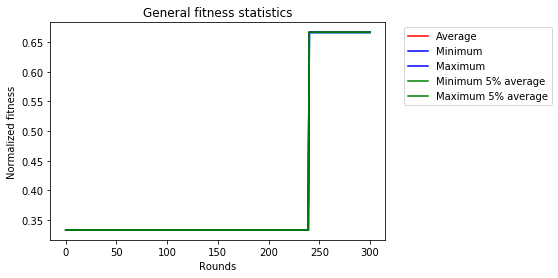

Constraint graph available only for binary constraints
CPU times: user 424 ms, sys: 200 ms, total: 624 ms
Wall time: 588 ms


In [6]:
%%time

initial = [0, 0, 0, 0, 0, 0, 0, 0]
probability = 0.05
rounds = 300
orgNum = 1
clause1 = ConstraintSat([1],1)
clause2 = ConstraintSat([2],1)
clauses = [clause1, clause2]

mySim = Simulator(1, initial, probability, rounds, orgNum, clauses, None, 1, 1, True)
mySim.run()
mySim.printStatistics()

#mySim.printLocalStatistics()
mySim.plotConstraintGraph()

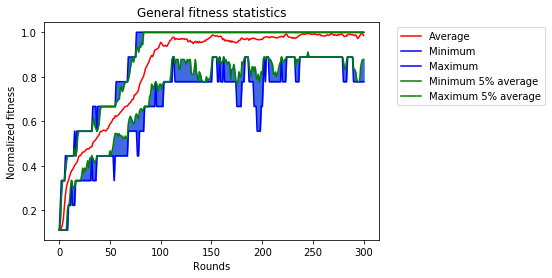

Constraint graph available only for binary constraints
CPU times: user 5.42 s, sys: 173 ms, total: 5.6 s
Wall time: 5.34 s


In [7]:
%%time

initial = [0, 0, 0, 0, 0, 0, 0, 0]
probability = 0.01
rounds = 300
orgNum = 200
clause1 = ConstraintSat([1],1)
clause2 = ConstraintSat([2],1)
clause3 = ConstraintSat([3],1)
clause4 = ConstraintSat([4],1)
clause5 = ConstraintSat([5],1)
clause6 = ConstraintSat([6],1)
clause7 = ConstraintSat([7],1)
clause8 = ConstraintSat([8],1)
clauses = [clause1, clause2, clause3, clause4, clause5, clause6, clause7, clause8]

mySim = Simulator(1, initial, probability, rounds, orgNum, clauses, None, 1, 1, True)
mySim.run()
mySim.printStatistics()

#mySim.printLocalStatistics()
mySim.plotConstraintGraph()

In [23]:
def distribModel(u, n, r, fitChild):
    p = np.zeros((n + 1, n + 1))
    v = np.zeros(n + 1)
    v[0] = 1
    for i in range(n):
        p[i][i+1] = u * (n - i) / n
        p[i + 1][i] = u * (i + 1) / n
        p[i][i] = 1 - u
    p[n][n] = 1 - u
    distrib = [v]
    print(p)
    for i in range(r):
        w = v * fitChild
        c = 1 / np.sum(w)
        v = c * w.dot(p)
        distrib.append(v)
    return distrib

In [24]:
def normalize(v):
    c = 1 / np.sum(v)
    return c * v

In [25]:
def distribModel2(u, n, r, fitChild):
    p = np.zeros((n + 1, n + 1))
    v = np.zeros(n + 1)
    v[0] = 1
    for i in range(n):
        p[i][i+1] = u * (n - i) / n
        p[i + 1][i] = u * (i + 1) / n
        p[i][i] = 1 - u
    p[n][n] = 1 - u
    distrib = [v]
    for i in range(r):
        v = (v * fitChild).dot(p)
        distrib.append(normalize(v))
    return distrib

[[0.99    0.01    0.      0.      0.      0.      0.      0.      0.     ]
 [0.00125 0.99    0.00875 0.      0.      0.      0.      0.      0.     ]
 [0.      0.0025  0.99    0.0075  0.      0.      0.      0.      0.     ]
 [0.      0.      0.00375 0.99    0.00625 0.      0.      0.      0.     ]
 [0.      0.      0.      0.005   0.99    0.005   0.      0.      0.     ]
 [0.      0.      0.      0.      0.00625 0.99    0.00375 0.      0.     ]
 [0.      0.      0.      0.      0.      0.0075  0.99    0.0025  0.     ]
 [0.      0.      0.      0.      0.      0.      0.00875 0.99    0.00125]
 [0.      0.      0.      0.      0.      0.      0.      0.01    0.99   ]]


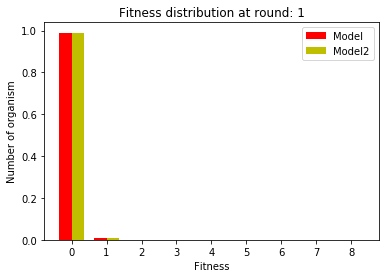

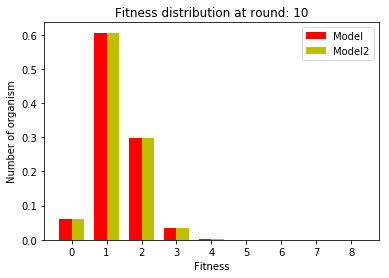

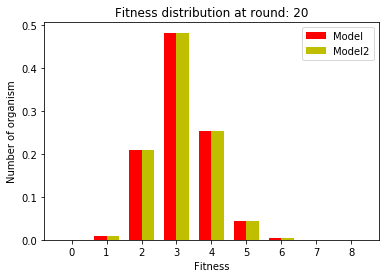

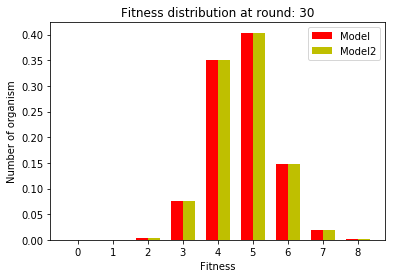

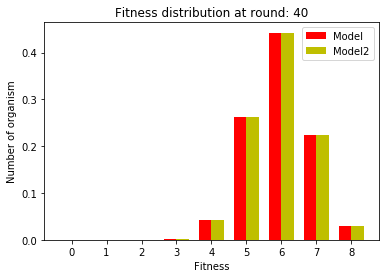

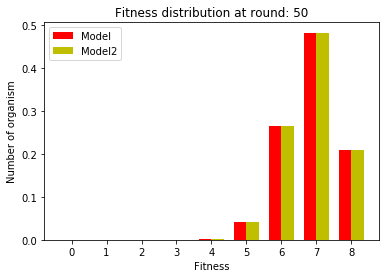

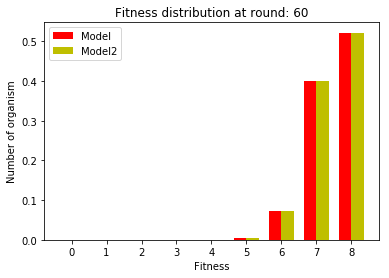

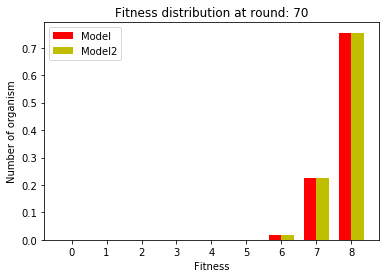

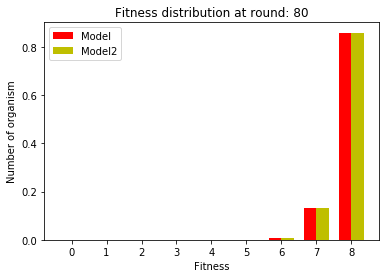

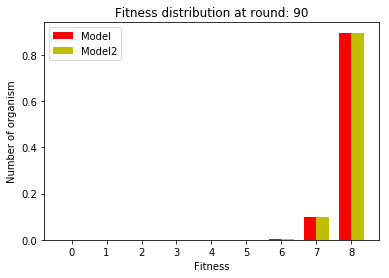

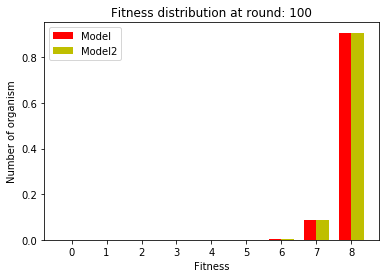

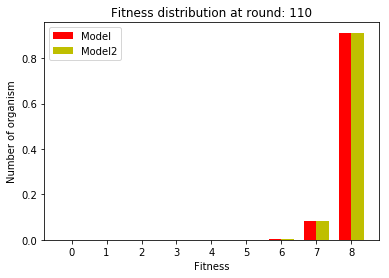

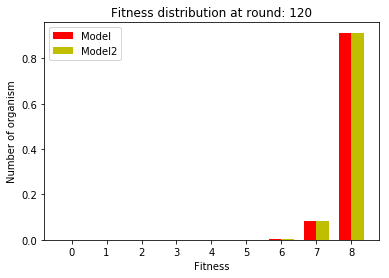

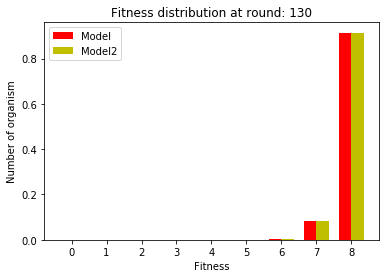

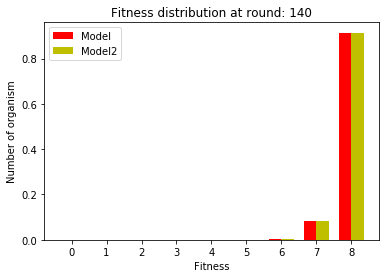

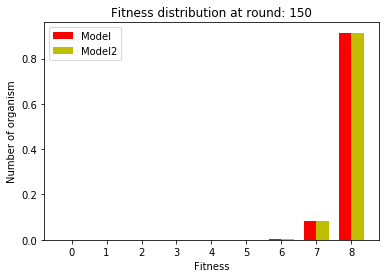

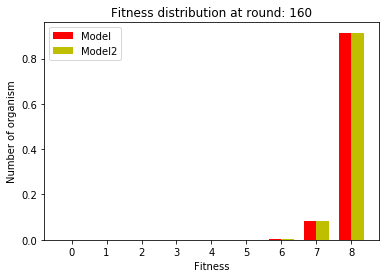

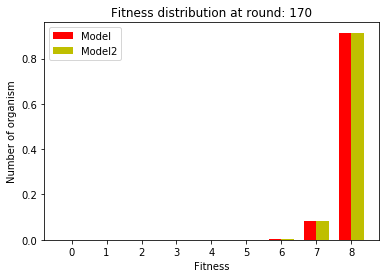

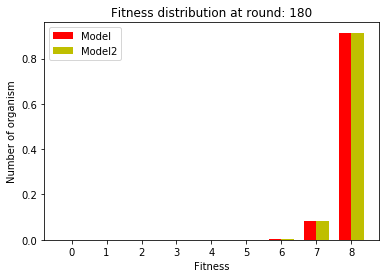

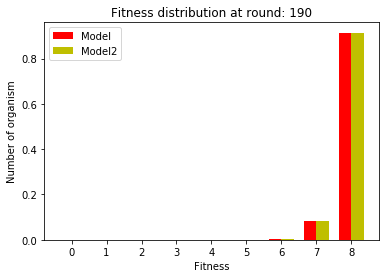

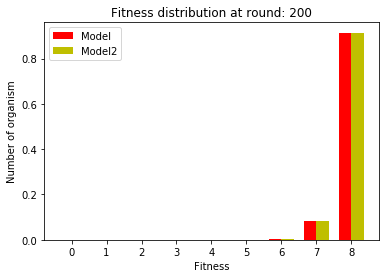

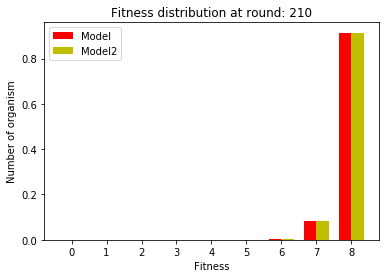

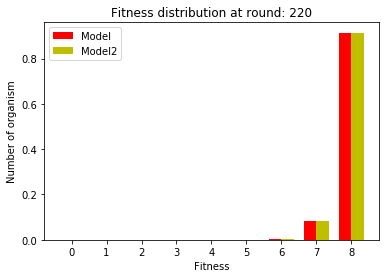

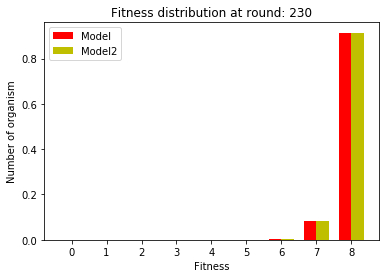

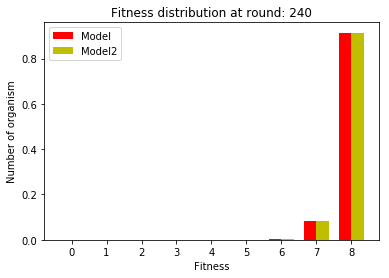

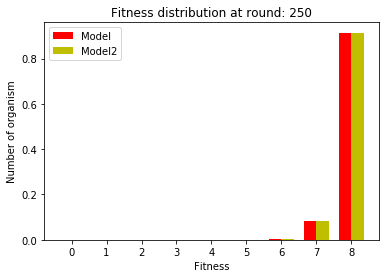

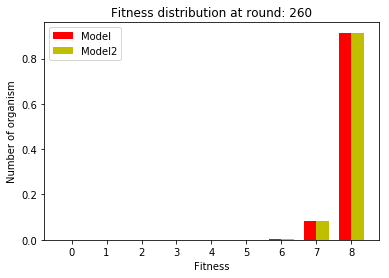

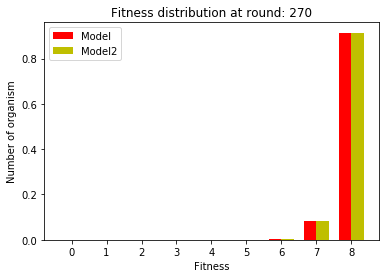

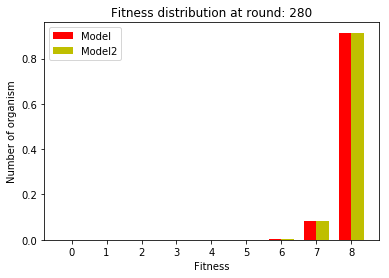

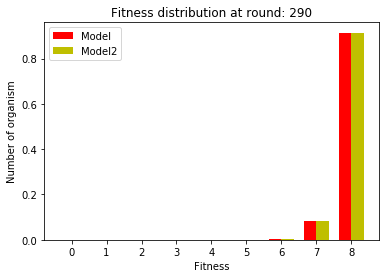

In [26]:
n = len(initial)
u = probability
m = orgNum
r = rounds
fc = [1,2,3,4,5,6,7,8,9]
rep = 30
distrib = distribModel(u, n, r, fc)
distrib2 = distribModel2(u, n, r, fc)

for i in range(int(r / 10)):
    i = i * 10
    if i == 0:
        i = 1
    width = 0.35
    ind = np.arange(n + 1)
    fig, ax = plt.subplots()
    plot1 = ax.bar(ind, distrib[i], width, color='r')
    plot2 = ax.bar(ind + width, distrib2[i], width, color='y')
    
    ax.set_ylabel('Number of organism')
    ax.set_title('Fitness distribution at round: ' + str(i))
    ax.set_xlabel('Fitness')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(tuple(map(lambda x: str(x), np.arange(n + 1))))
    
    ax.legend((plot1[0], plot2[0]), ('Model', 'Model2'))
    plt.show()

[[0.99    0.01    0.      0.      0.      0.      0.      0.      0.     ]
 [0.00125 0.99    0.00875 0.      0.      0.      0.      0.      0.     ]
 [0.      0.0025  0.99    0.0075  0.      0.      0.      0.      0.     ]
 [0.      0.      0.00375 0.99    0.00625 0.      0.      0.      0.     ]
 [0.      0.      0.      0.005   0.99    0.005   0.      0.      0.     ]
 [0.      0.      0.      0.      0.00625 0.99    0.00375 0.      0.     ]
 [0.      0.      0.      0.      0.      0.0075  0.99    0.0025  0.     ]
 [0.      0.      0.      0.      0.      0.      0.00875 0.99    0.00125]
 [0.      0.      0.      0.      0.      0.      0.      0.01    0.99   ]]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.0079019  0.0079019  0.         ... 0.         0.         0.        ]
 [0.01775077 0.01775077 0.         ...

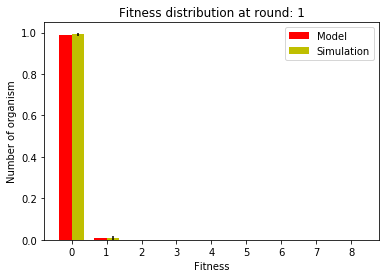

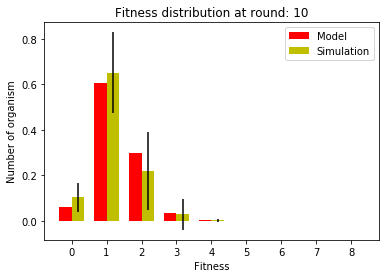

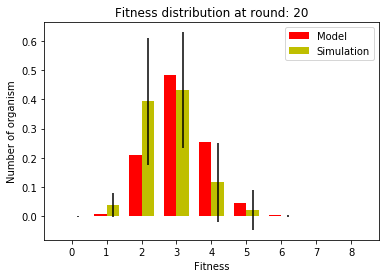

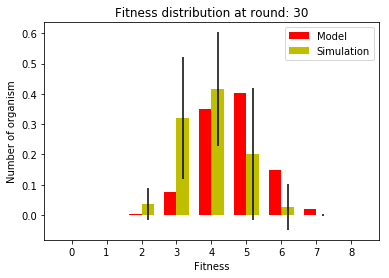

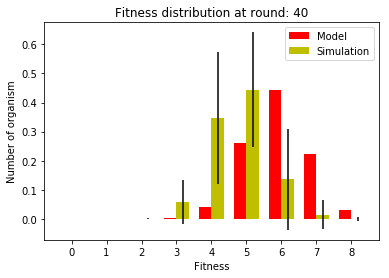

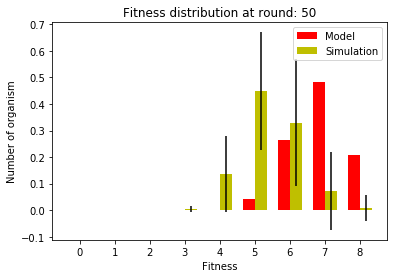

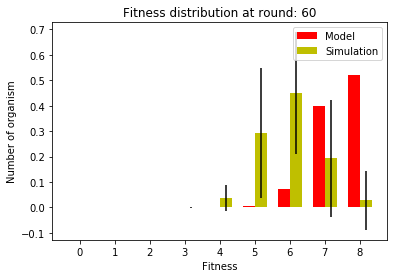

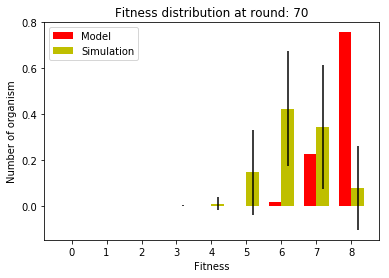

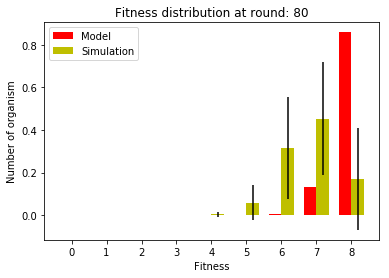

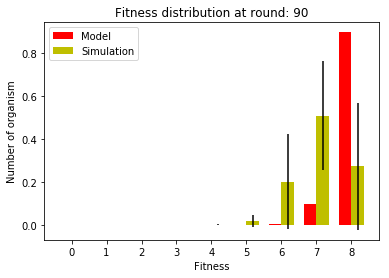

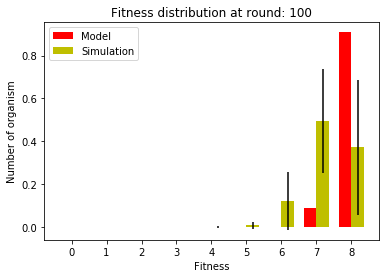

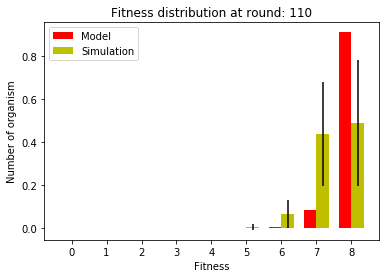

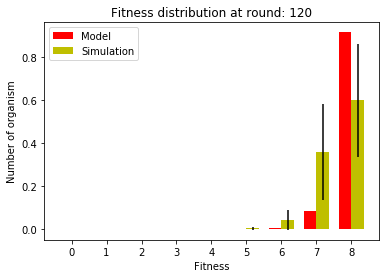

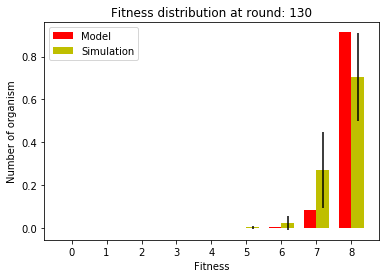

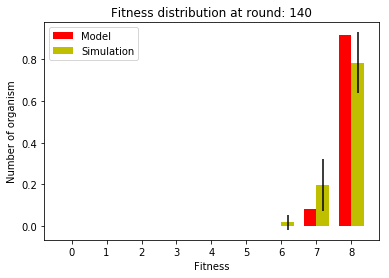

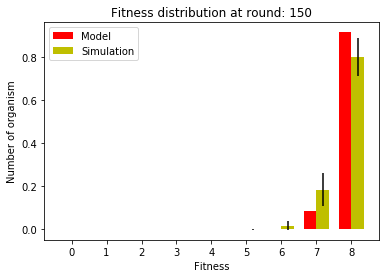

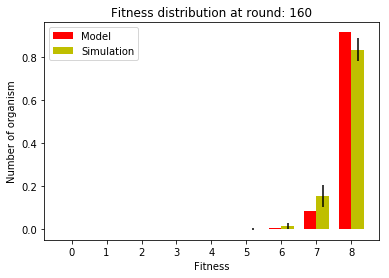

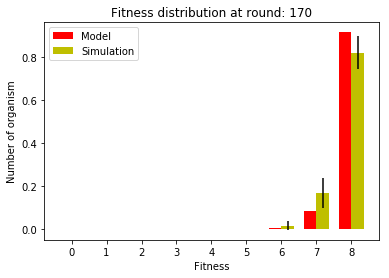

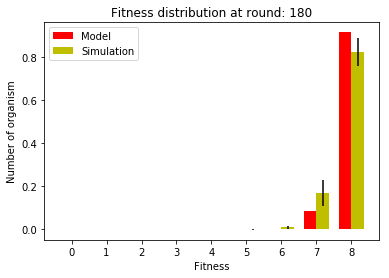

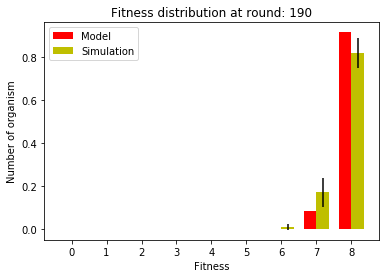

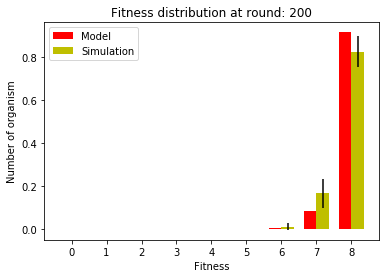

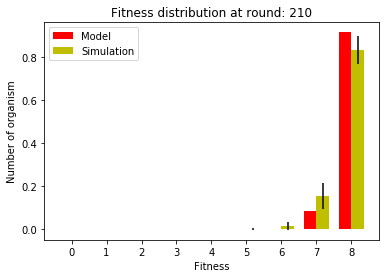

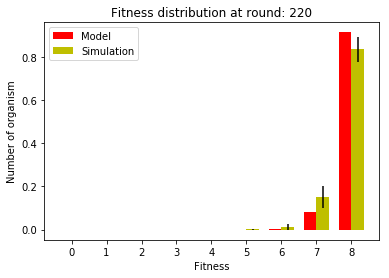

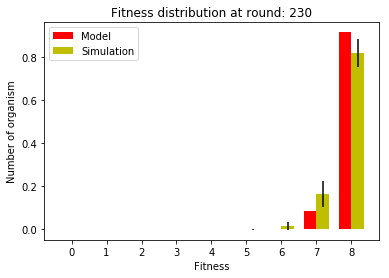

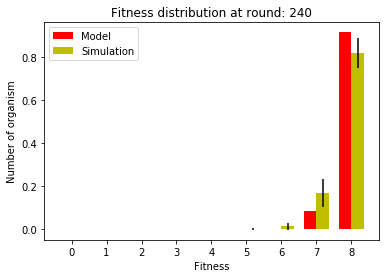

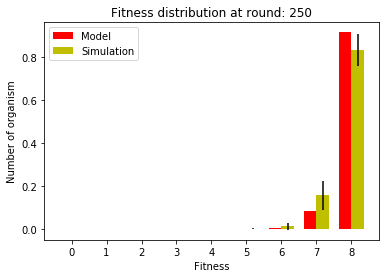

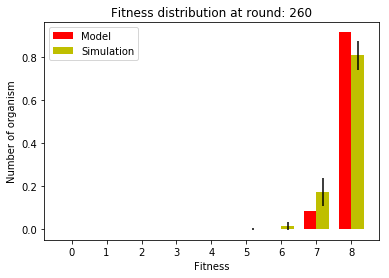

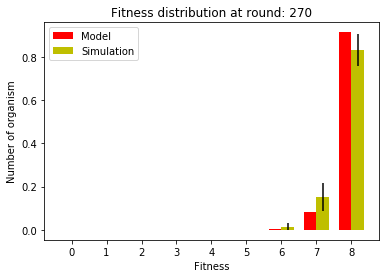

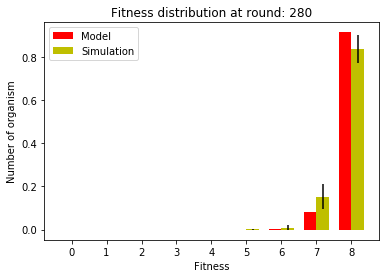

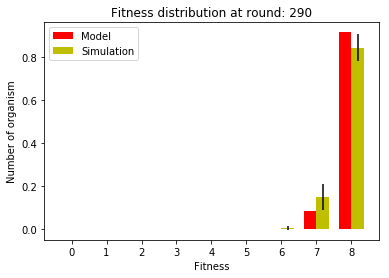

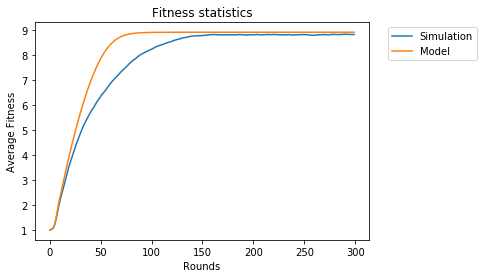

In [67]:
n = len(initial)
u = probability
m = orgNum
r = rounds
fc = [1,2,3,4,5,6,7,8,9]
rep = 50
distrib = distribModel(u, n, r, fc)
simDistrib = []
for i in range(rep):
    print(i)
    mySim = Simulator(1, initial, probability, rounds, orgNum, clauses, None, 1, 1, True)
    mySim.run()
    dis = mySim.getDistribution()
    lstD = np.zeros((r,n + 1))
    for j in range(r):
        for k in dis[j]:
            lstD[j][k - 1] += dis[j][k]
    simDistrib.append(lstD.copy() / orgNum)
simStd = np.std(simDistrib, axis = 0)
simDistrib = np.average(simDistrib, axis = 0)
print(simStd)

for i in range(int(r / 10)):
    i = i * 10
    if i == 0:
        i = 1
    md = distrib[i]
    sd = simDistrib[i]
    ssd = simStd[i]
    width = 0.35
    ind = np.arange(n + 1)
    fig, ax = plt.subplots()
    plot1 = ax.bar(ind, md, width, color='r')
    plot2 = ax.bar(ind + width, sd, width, color='y', yerr = ssd)
    
    ax.set_ylabel('Number of organism')
    ax.set_title('Fitness distribution at round: ' + str(i))
    ax.set_xlabel('Fitness')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(tuple(map(lambda x: str(x), np.arange(n + 1))))
    
    ax.legend((plot1[0], plot2[0]), ('Model', 'Simulation'))
    plt.show()

sims = []
models = []
rnds = []

for i in range(r):
    sAvg = simDistrib[i].dot(fc - 1)
    mAvg = distrib[i].dot(fc - 1)
    sims.append(sAvg)
    models.append(mAvg)
    rnds.append(i)

plt.title("Fitness statistics")
plt.xlabel("Rounds")
plt.ylabel("Average Fitness")
plt.plot(rnds, sims, label = "Simulation")
plt.plot(rnds, models, label = "Model")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()


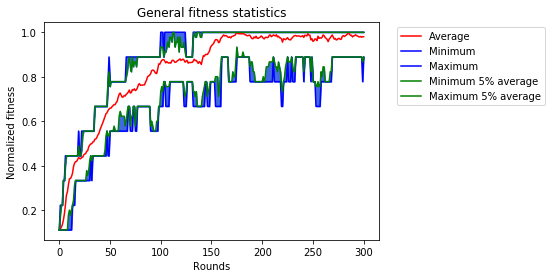

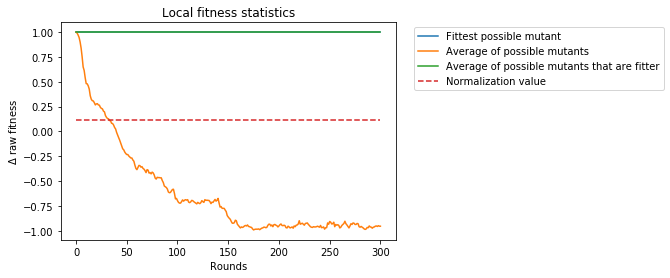

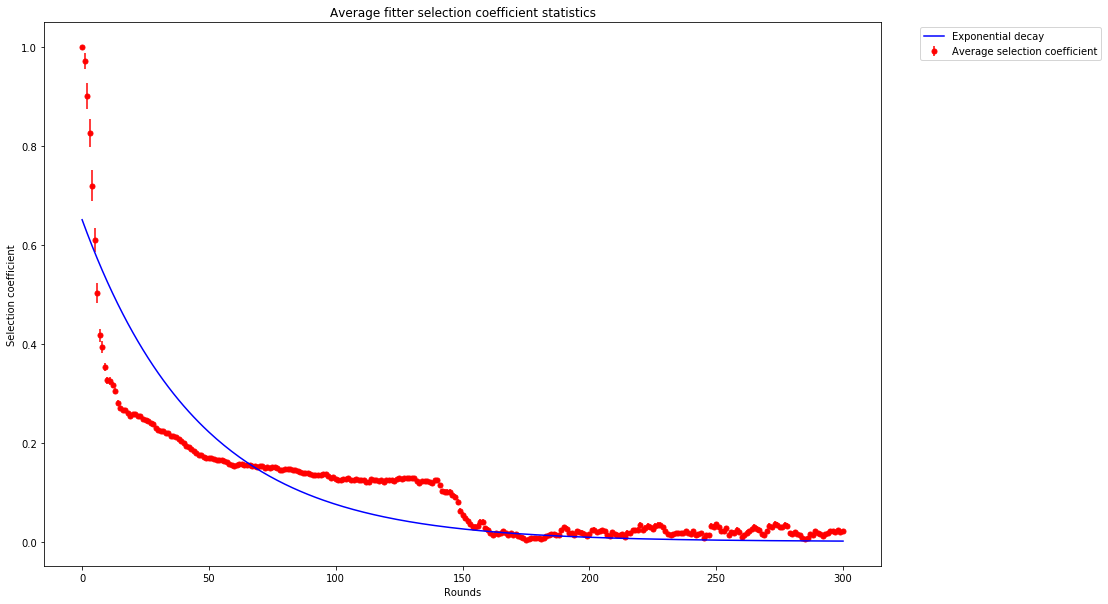

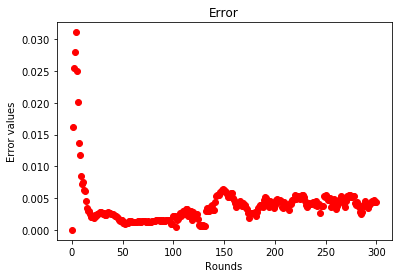

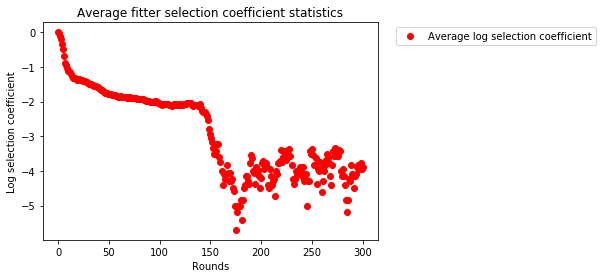

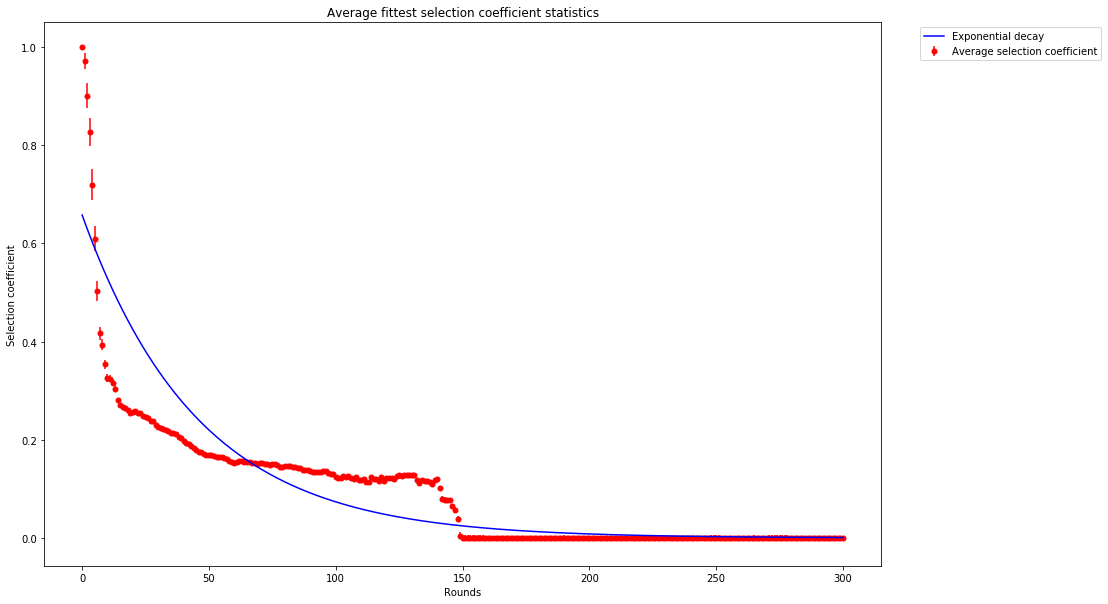

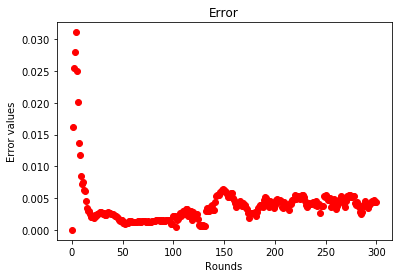

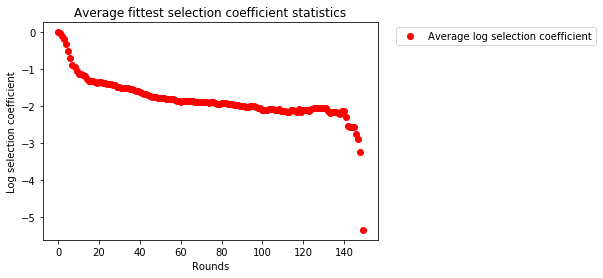

Constraint graph available only for binary constraints
CPU times: user 5.56 s, sys: 2 s, total: 7.56 s
Wall time: 4.66 s


In [24]:
%%time

initial = [0, 0, 0, 0, 0, 0, 0, 0]
probability = 0.01
rounds = 300
orgNum = 100
clause1 = ConstraintSat([1],1)
clause2 = ConstraintSat([2],1)
clause3 = ConstraintSat([3],1)
clause4 = ConstraintSat([4],1)
clause5 = ConstraintSat([5],1)
clause6 = ConstraintSat([6],1)
clause7 = ConstraintSat([7],1)
clause8 = ConstraintSat([8],1)
clauses = [clause1, clause2, clause3, clause4, clause5, clause6, clause7, clause8]

mySim = Simulator(1, initial, probability, rounds, orgNum, clauses, None, 1, 1)
mySim.run()
mySim.printStatistics()
mySim.printLocalStatistics()
mySim.plotConstraintGraph()

In [89]:
def simulate1 (p, orgNum, genLen, clauseNum, weight, f):
    initial = [0] * genLen
    probability = p
    rounds = 200
    clauses = []
    for i in range(0, clauseNum):
        clauses.append(ConstraintSat([i + 1], weight))
    mySim = Simulator(1, initial, probability, rounds, orgNum, clauses, None, 1, 1)
    mySim.run()
    mySim.writeRunDataToFile(f)
    coeff = mySim.getExpCoeff()
    return coeff

(0.09315729513657973, 0.002277348150976179)
(0.13674254294345642, 0.0020378435194809592)
(0.1679629578322822, 0.002027017056085777)
(0.17160615969409415, 0.0020683483180246928)
(0.1669432201598081, 0.0020713504705286976)
(0.1842345604774237, 0.002042960728194025)
(0.2027130823717595, 0.002184333540398342)
(0.2557135953602566, 0.0023992502409491225)
(0.2927228243807078, 0.002609940908093683)
(0.32389918678065166, 0.0027054888680449257)
(0.3485420290174328, 0.0028669568926578608)


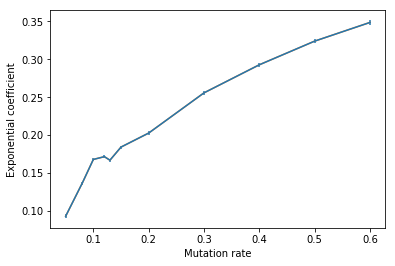

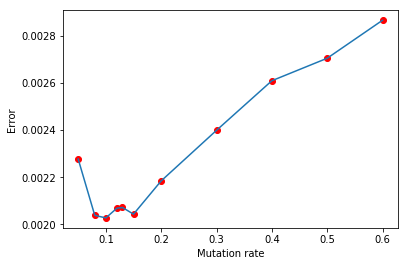

In [95]:
prob = [0.05, 0.08, 0.1, 0.12, 0.13,0.15,0.2,0.3, 0.4, 0.5, 0.6]
coeff = []
error = []

f = open("seeds.txt", "w")

runs = 5

for p in prob:
    cfAvg = 0
    erAvg = 0
    for i in range(runs):
        c = simulate1(p, 100, 20, 20, 1,f)
        cfAvg += c[0]
        erAvg += c[1]
    cfAvg /= runs
    erAvg /= runs
    print((cfAvg, erAvg))
    coeff.append(cfAvg)
    error.append(erAvg)
    
plt.ylabel("Exponential coefficient")
plt.xlabel("Mutation rate")
plt.errorbar(prob, coeff, yerr = error)
plt.plot(prob, coeff)
plt.show()
plt.ylabel("Error")
plt.xlabel("Mutation rate")
plt.plot(prob, error, 'ro')
plt.plot(prob, error)
plt.show()

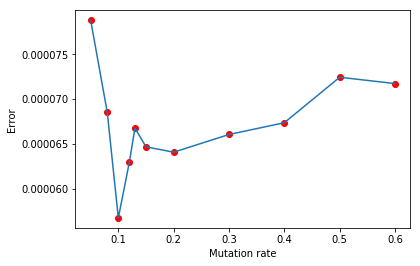

In [9]:
plt.ylabel("Error")
plt.xlabel("Mutation rate")
plt.plot(prob, np.array(error)**2/np.array(coeff), 'ro')
plt.plot(prob, np.array(error)**2/np.array(coeff))
plt.show()

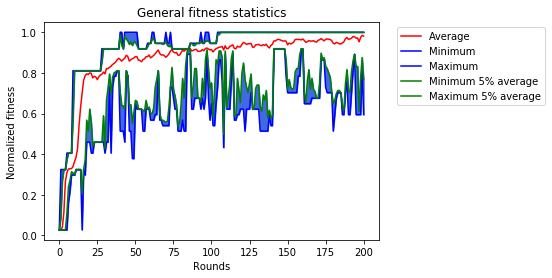

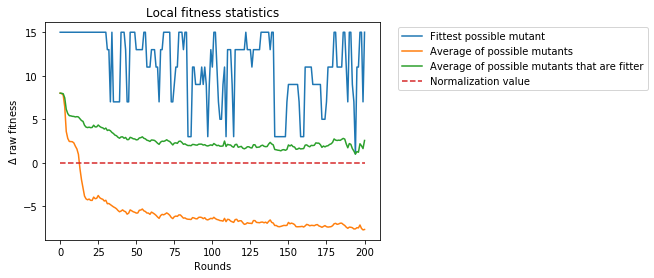

/media/alexandru/C42E2B702E2B5AA6/Programare/Project/Evolution-Simulator/Simulator.py:263: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-c*x)


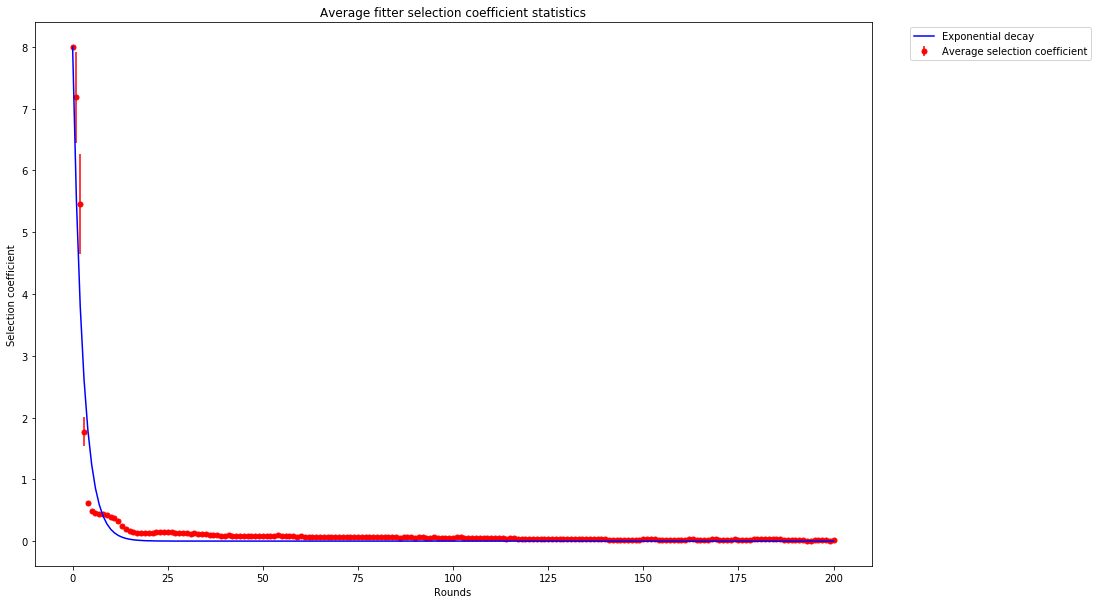

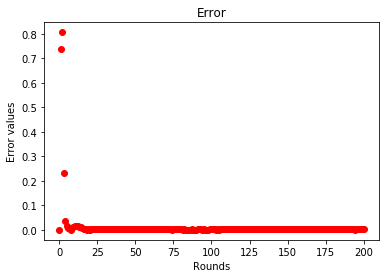

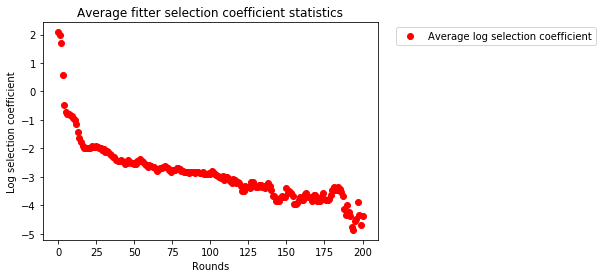

/home/alexandru/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:459: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)


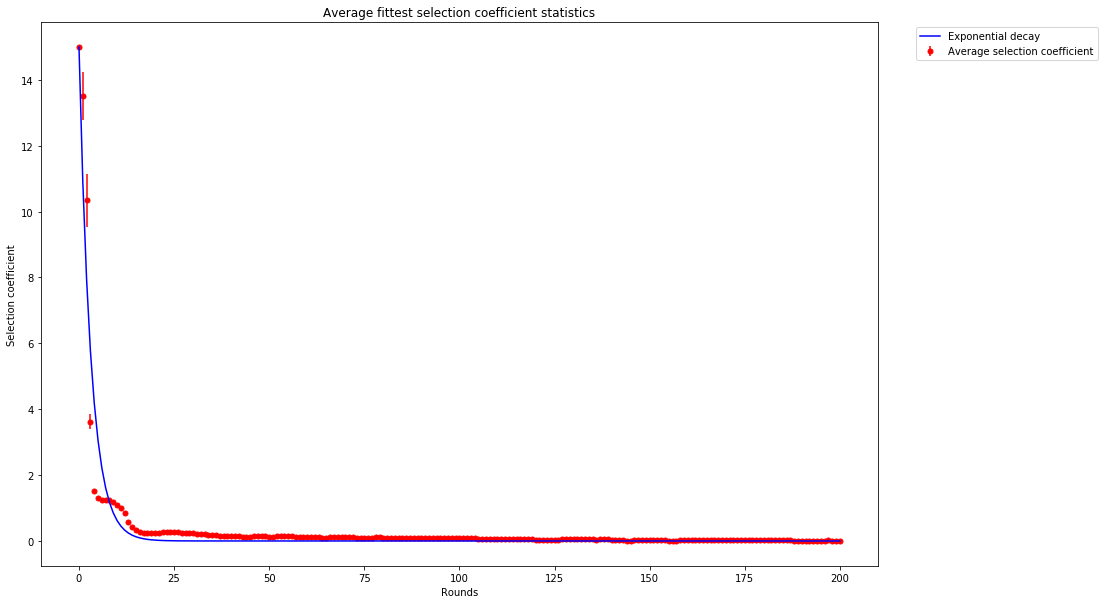

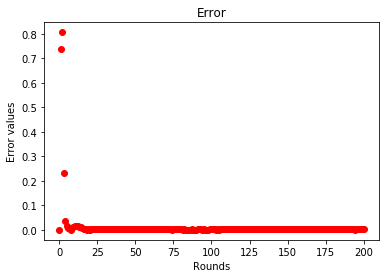

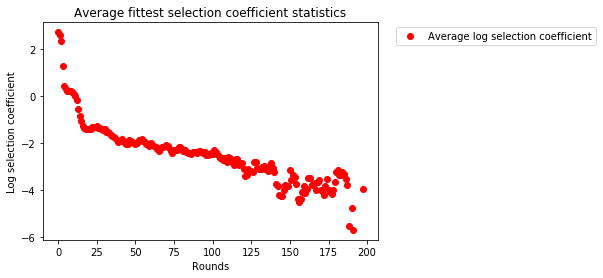

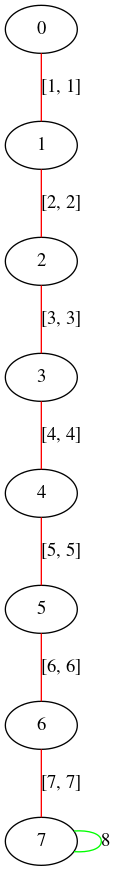

In [7]:
initial = [1, 0, 1, 0, 1, 0, 1, 0]
probability = 0.01
rounds = 200
orgNum = 100
cons0 = ConstraintBinaryModelUnary(7, 8)
cons1 = ConstraintBinaryModelBinarySame([0,1],[1,1])
cons2 = ConstraintBinaryModelBinarySame([1,2],[2,2])
cons3 = ConstraintBinaryModelBinarySame([2,3],[3,3])
cons4 = ConstraintBinaryModelBinarySame([3,4],[4,4])
cons5 = ConstraintBinaryModelBinarySame([4,5],[5,5])
cons6 = ConstraintBinaryModelBinarySame([5,6],[6,6])
cons7 = ConstraintBinaryModelBinarySame([6,7],[7,7])

constraints = [cons0, cons1,cons2,cons3,cons4,cons5,cons6,cons7]
mySim = Simulator(2, initial, probability, rounds, orgNum, constraints, None, 1, 1)
mySim.run()
mySim.printStatistics()
mySim.printLocalStatistics()
G = mySim.plotConstraintGraph()
draw(G, show = 'ipynb')

(0.10913759773056841, 0.0020464549930738116)
(0.23188221764850936, 0.002920699692901911)


/media/alexandru/C42E2B702E2B5AA6/Programare/Project/Evolution-Simulator/Simulator.py:279: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-c*x)


(0.3383236723561991, 0.00357941863127804)


/media/alexandru/C42E2B702E2B5AA6/Programare/Project/Evolution-Simulator/Simulator.py:279: RuntimeWarning: overflow encountered in multiply
  return a*np.exp(-c*x)


(0.40637553203616444, 0.004458743491495283)
(0.53853456894035, 0.007158258445754307)
(0.6530380422769951, 0.010102016143926912)
(0.6575009483672338, 0.01741924201515786)
(0.7523893160761248, 0.022992358831288594)
(0.743242418454384, 0.03857884105049245)
(0.9529363833941492, 0.02766260934277342)
(1.071515277455503, 0.022540177303136632)
(1.1131813819939445, 0.030199196392130236)


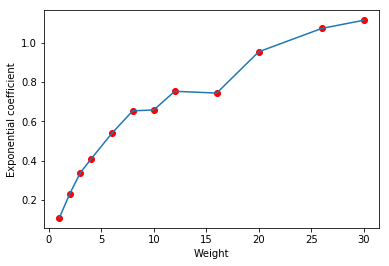

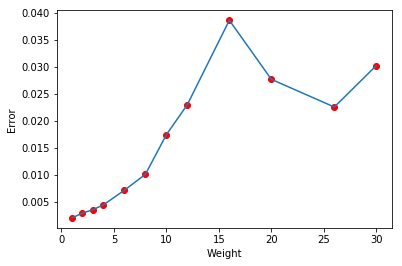

In [90]:
weights = [1,2,3,4,6,8,10,12,16,20,26,30]
coeff = []
error = []

f = open("seeds.txt", "w")

runs = 5

for w in weights:
    cfAvg = 0
    erAvg = 0
    for i in range(runs):
        c = simulate1(0.05, 200, 20, 20, w,f)
        cfAvg += c[0]
        erAvg += c[1]
    cfAvg /= runs
    erAvg /= runs
    print((cfAvg, erAvg))
    coeff.append(cfAvg)
    error.append(erAvg)
plt.ylabel("Exponential coefficient")
plt.xlabel("Weight")
plt.plot(weights, coeff, 'ro')
plt.plot(weights, coeff)
plt.show()
plt.ylabel("Error")
plt.xlabel("Weight")
plt.plot(weights, error, 'ro')
plt.plot(weights, error)
plt.show()

(0.0035859731672525617, 0.004590681821916543)
(0.005706585487518835, 0.004912659211175599)
(0.007909378117669263, 0.004537775676541254)
(0.07680634090900729, 0.005554280943056003)
(0.09796305665232136, 0.00453133739990616)
(0.1199900053629351, 0.0038232680709095026)
(0.13261093619938866, 0.0025443516251037294)
(0.1552084341655388, 0.002027030349679997)
(0.14757485192164954, 0.0015400124230138302)
(0.1477753334762421, 0.0013061037865048967)


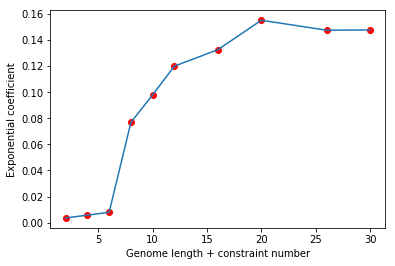

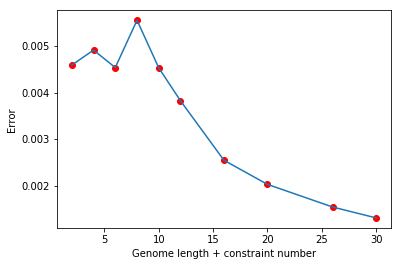

In [9]:
genLen = [2,4,6,8,10,12,16,20,26,30]
coeff = []
error = []

f = open("seeds.txt", "w")

runs = 5

for l in genLen:
    cfAvg = 0
    erAvg = 0
    for i in range(runs):
        c = simulate1(0.1, 100, l, l, 1,f)
        cfAvg += c[0]
        erAvg += c[1]
    cfAvg /= runs
    erAvg /= runs
    print((cfAvg, erAvg))
    coeff.append(cfAvg)
    error.append(erAvg)
plt.ylabel("Exponential coefficient")
plt.xlabel("Genome length + constraint number")
plt.plot(genLen, coeff, 'ro')
plt.plot(genLen, coeff)
plt.show()
plt.ylabel("Error")
plt.xlabel("Genome length + constraint number")
plt.plot(genLen, error, 'ro')
plt.plot(genLen, error)
plt.show()

In [10]:
def simulate2 (p, orgNum, genLen, clauseNum, weight,f):
    initial = [0,1] * genLen
    probability = p
    rounds = 200
    clauses = []
    x = 1
    clauses.append(ConstraintBinaryModelUnary(clauseNum - 1, 8))
    for i in range(0, clauseNum - 1):
        clauses.append(ConstraintBinaryModelBinarySame([i,i + 1],[i + 1,i + 1]))
    mySim = Simulator(2, initial, probability, rounds, orgNum, clauses, None, 1, 1)
    mySim.run()
    mySim.writeRunDataToFile(f)
    coeff = mySim.getExpCoeff()
    return coeff

(0.07819141012406865, 0.0011519116607712201)
(0.10542408545205942, 0.0009802444354532521)
(0.13102899198404774, 0.0008381836841428018)
(0.14745862190244674, 0.0008511893311915011)
(0.1613531715140361, 0.0013755637346588977)
(0.1571988828852283, 0.0018923894971801338)
(0.20516685703383297, 0.0025099607333623026)
(0.17522814366340367, 0.0029355169473606925)
(0.151831616284143, 0.003034360355723575)
(0.20839350852925137, 0.0034077786346090773)
(0.18835344464443524, 0.0039669743461165086)
(0.0948216488914271, 0.0033683181551267655)


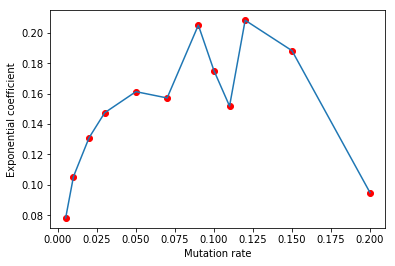

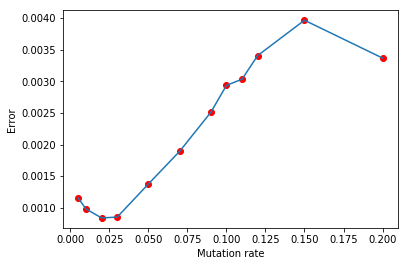

In [15]:
prob = [0.005, 0.01, 0.02, 0.03, 0.05, 0.07, 0.09,0.1, 0.11, 0.12, 0.15, 0.2]
coeff = []
error = []

f = open("seeds.txt", "w")

runs = 5

for p in prob:
    cfAvg = 0
    erAvg = 0
    for i in range(runs):
        c = simulate2(p, 100, 4, 8, 1,f)
        cfAvg += c[0]
        erAvg += c[1]
    cfAvg /= runs
    erAvg /= runs
    print((cfAvg, erAvg))
    coeff.append(cfAvg)
    error.append(erAvg)

plt.ylabel("Exponential coefficient")
plt.xlabel("Mutation rate")
plt.plot(prob, coeff, 'ro')
plt.plot(prob, coeff)
plt.show()
plt.ylabel("Error")
plt.xlabel("Mutation rate")
plt.plot(prob, error, 'ro')
plt.plot(prob, error)
plt.show()

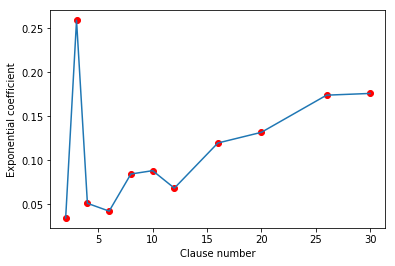

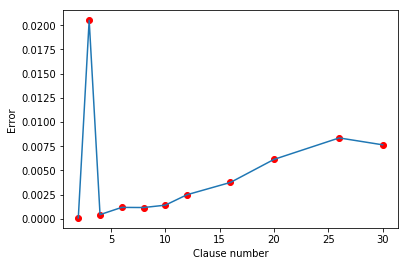

In [17]:
clauseNum = [2,3,4,6,8,10,12,16,20,26,30]
coeff = []
error = []

f = open("seeds.txt", "w")

runs = 5

for cNum in clauseNum:
    cfAvg = 0
    erAvg = 0
    for i in range(runs):
        c = simulate2(0.01, 100, cNum, cNum, 1,f)
        cfAvg += c[0]
        erAvg += c[1]
    cfAvg /= runs
    erAvg /= runs
    coeff.append(cfAvg)
    error.append(erAvg)
plt.ylabel("Exponential coefficient")
plt.xlabel("Clause number")
plt.plot(clauseNum, coeff, 'ro')
plt.plot(clauseNum, coeff)
plt.show()
plt.ylabel("Error")
plt.xlabel("Clause number")
plt.plot(clauseNum, error, 'ro')
plt.plot(clauseNum, error)
plt.show()

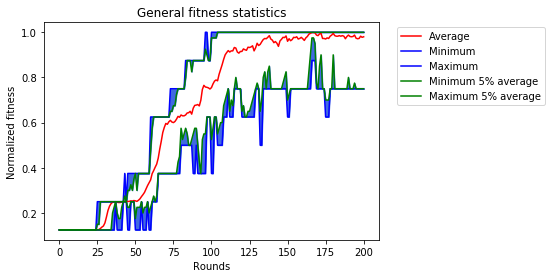

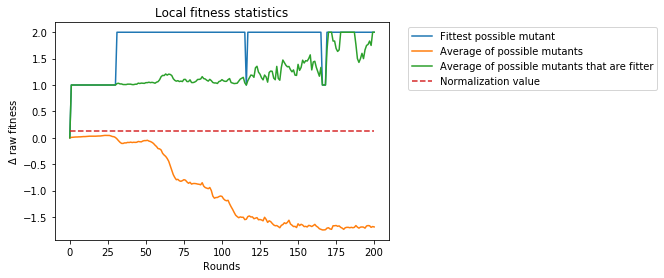

yeah


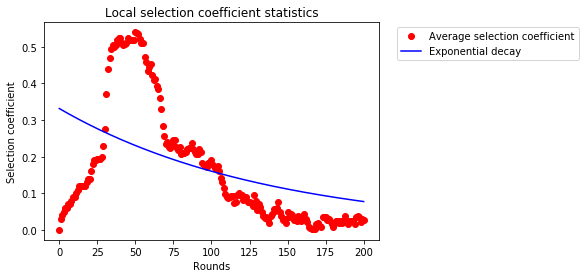

/home/alexandru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:312: RuntimeWarning: divide by zero encountered in log


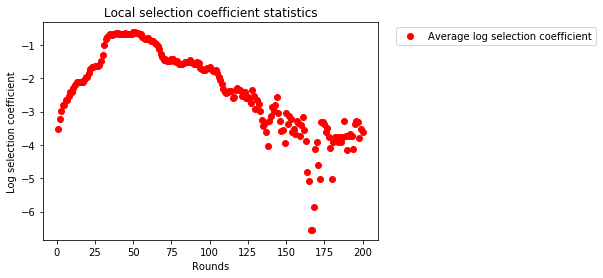

/home/alexandru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:261: RuntimeWarning: divide by zero encountered in power


yeah


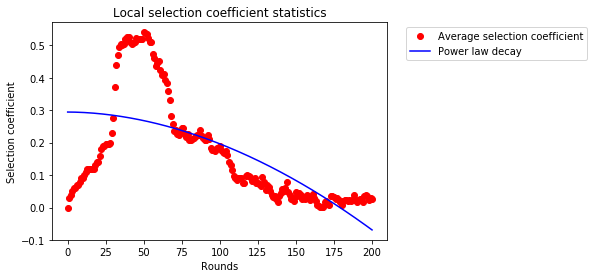

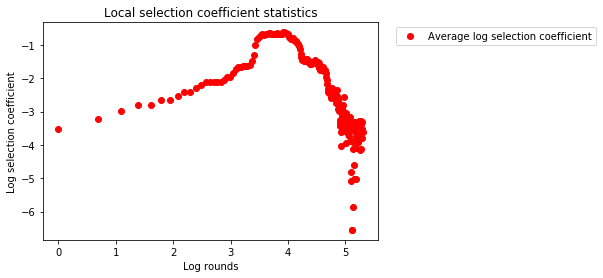

yeah


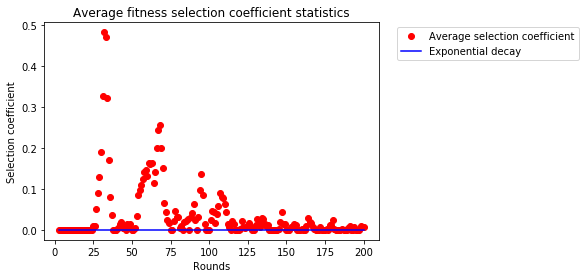

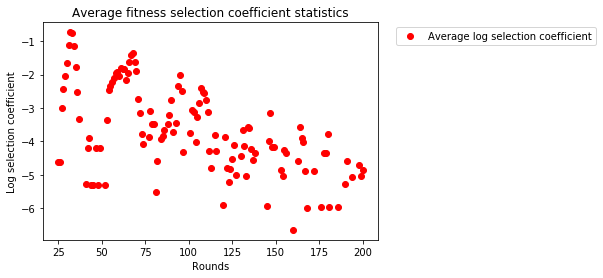

yeah


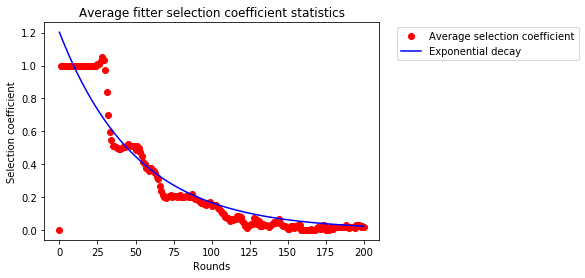

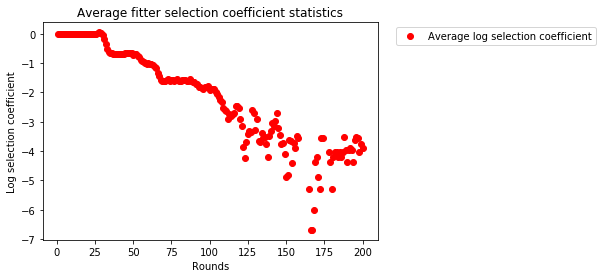

yeah


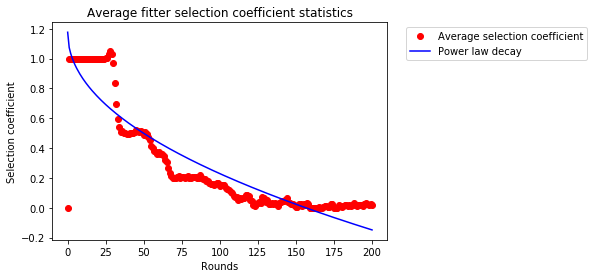

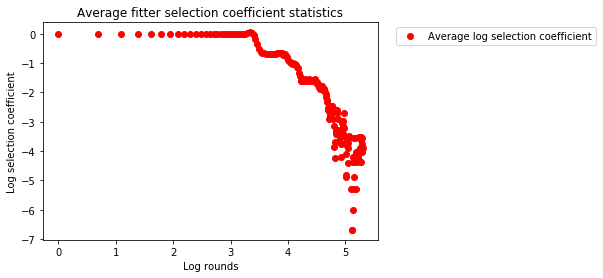

yeah


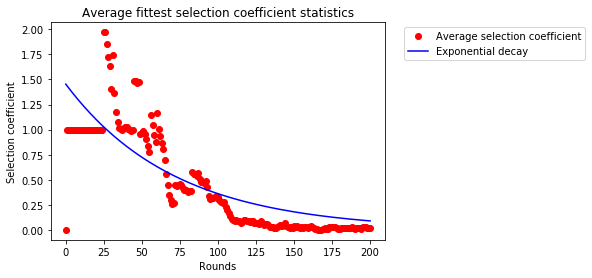

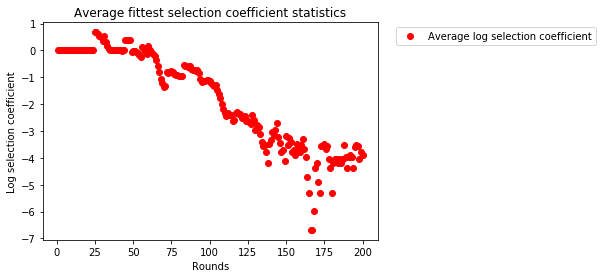

yeah


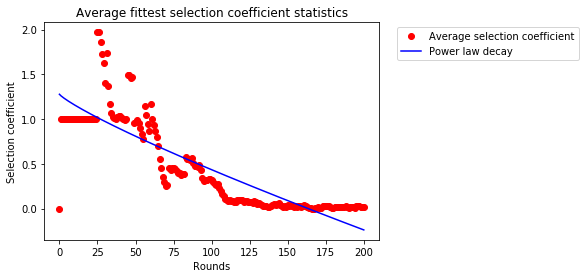

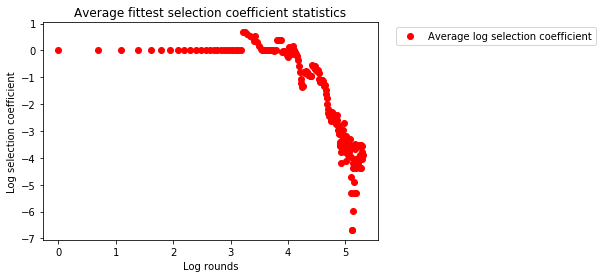

yeah


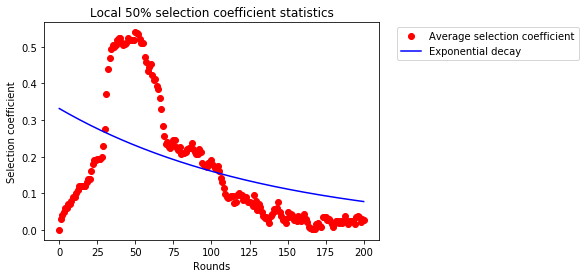

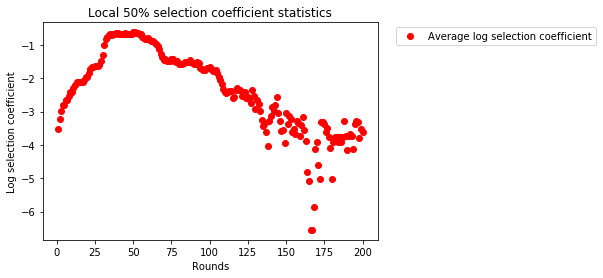

yeah


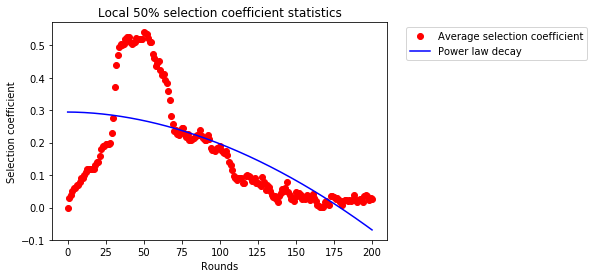

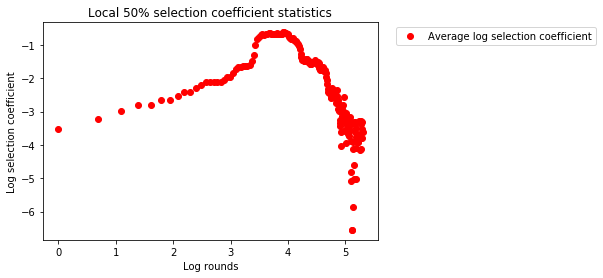

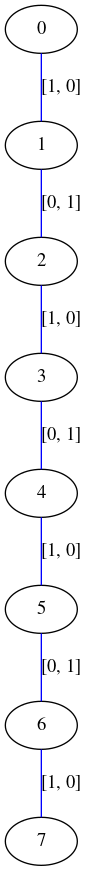

In [206]:
initial = [1, 0] * 4
probability = 0.01
rounds = 200
orgNum = 100
cons1 = ConstraintBinaryModelBinaryDifferent([0,1],[1,0])
cons2 = ConstraintBinaryModelBinaryDifferent([1,2],[0,1])
cons3 = ConstraintBinaryModelBinaryDifferent([2,3],[1,0])
cons4 = ConstraintBinaryModelBinaryDifferent([3,4],[0,1])
cons5 = ConstraintBinaryModelBinaryDifferent([4,5],[1,0])
cons6 = ConstraintBinaryModelBinaryDifferent([5,6],[0,1])
cons7 = ConstraintBinaryModelBinaryDifferent([6,7],[1,0])

constraints = [cons1,cons2,cons3,cons4,cons5,cons6,cons7]
mySim = Simulator(2, initial, probability, rounds, orgNum, constraints, None, 1, 1)
mySim.run()
mySim.printStatistics()
mySim.printLocalStatistics()
G = mySim.plotConstraintGraph()
draw(G, show = 'ipynb')

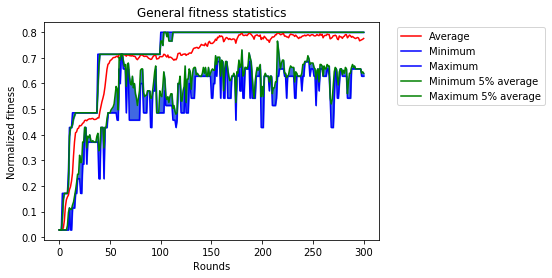

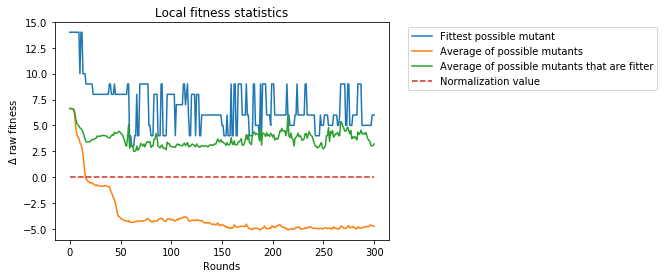

yeah


/home/alexandru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:259: RuntimeWarning: overflow encountered in exp


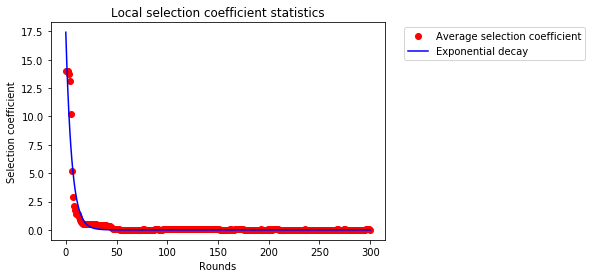

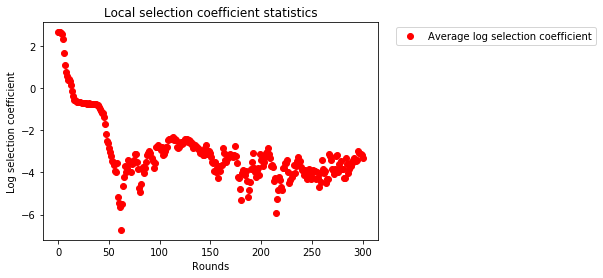

yeah


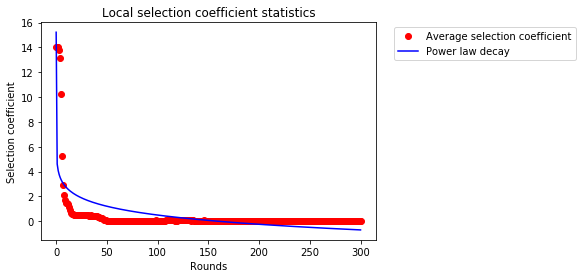

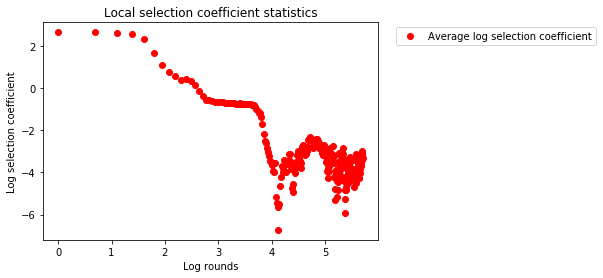

yeah


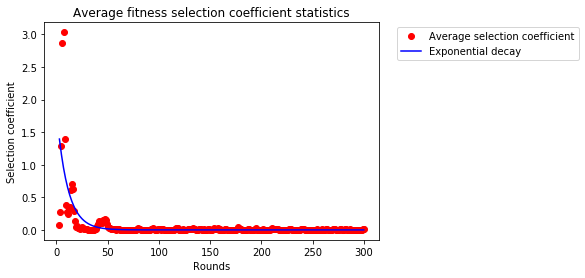

/home/alexandru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:312: RuntimeWarning: divide by zero encountered in log


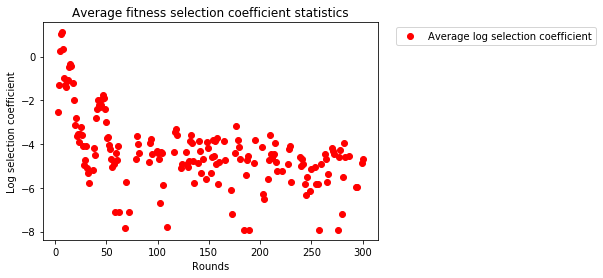

/home/alexandru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:259: RuntimeWarning: overflow encountered in multiply


yeah


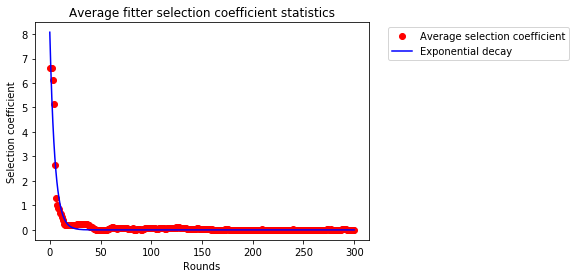

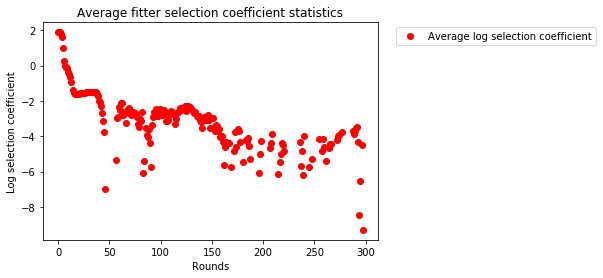

yeah


/home/alexandru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:261: RuntimeWarning: divide by zero encountered in power


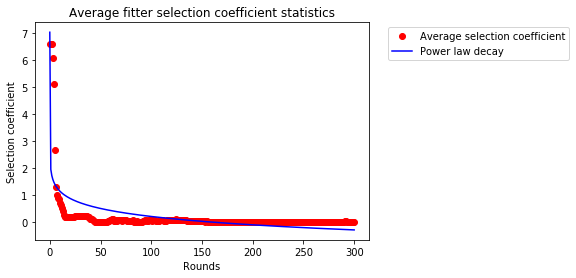

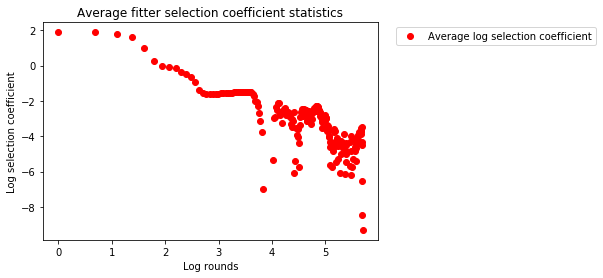

yeah


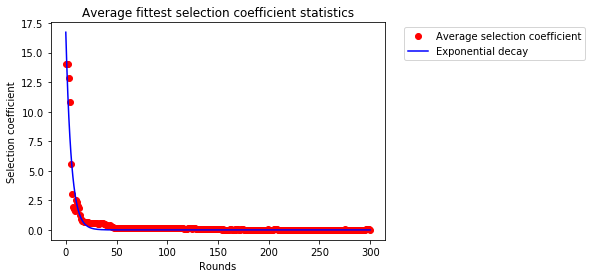

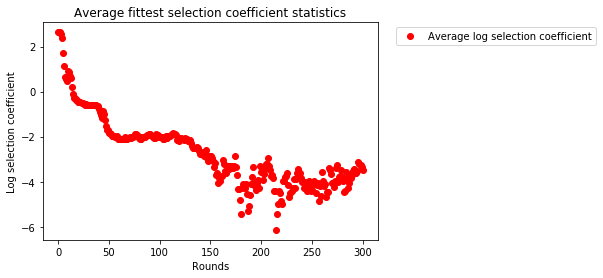

yeah


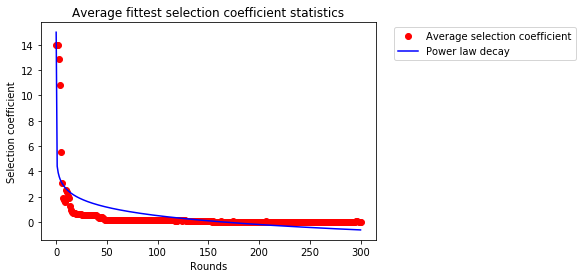

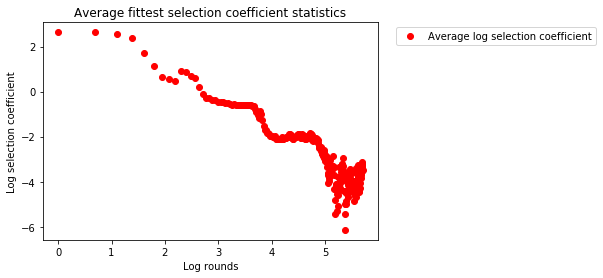

yeah


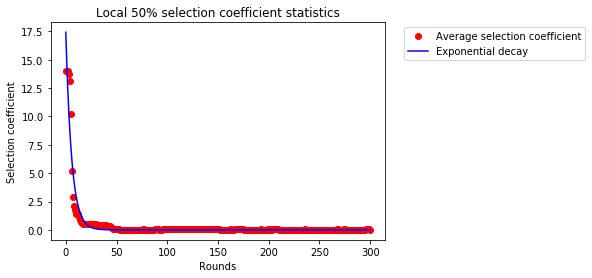

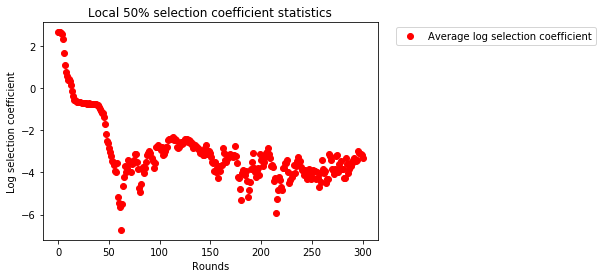

yeah


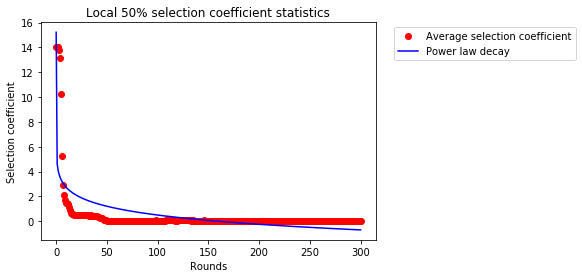

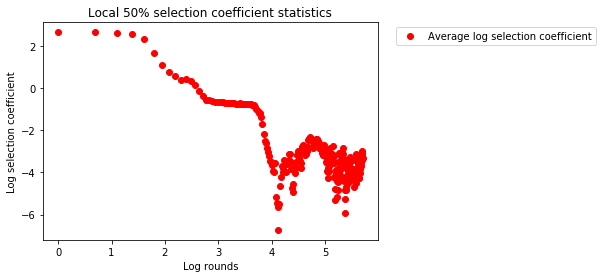

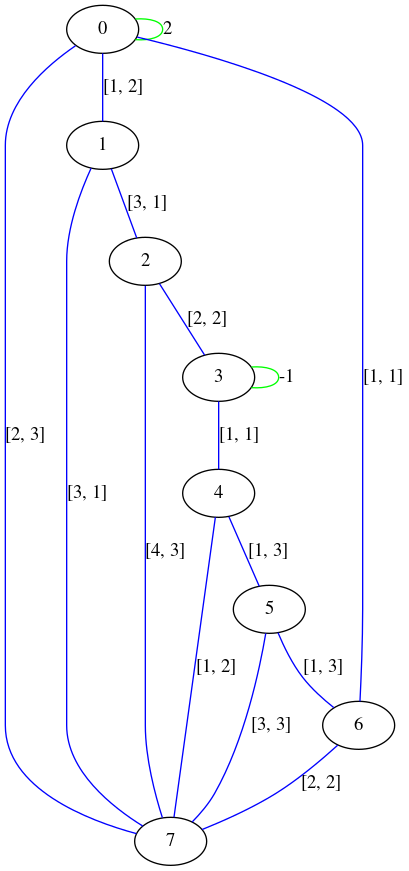

In [214]:
initial = [0] * 8
probability = 0.01
rounds = 300
orgNum = 100
cons1 = ConstraintBinaryModelUnary(0, 2)
cons2 = ConstraintBinaryModelUnary(3, -1)
cons3 = ConstraintBinaryModelBinaryDifferent([0,7],[2,3])
cons4 = ConstraintBinaryModelBinaryDifferent([0,1],[1,2])
cons5 = ConstraintBinaryModelBinaryDifferent([1,7],[3,1])
cons6 = ConstraintBinaryModelBinaryDifferent([1,2],[3,1])
cons7 = ConstraintBinaryModelBinaryDifferent([7,2],[4,3])
cons8 = ConstraintBinaryModelBinaryDifferent([2,3],[2,2])
cons9 = ConstraintBinaryModelBinaryDifferent([4,3],[1,1])
cons10 = ConstraintBinaryModelBinaryDifferent([4,7],[1,2])
cons11 = ConstraintBinaryModelBinaryDifferent([4,5],[1,3])
cons12 = ConstraintBinaryModelBinaryDifferent([7,5],[3,3])
cons13 = ConstraintBinaryModelBinaryDifferent([6,5],[1,3])
cons14 = ConstraintBinaryModelBinaryDifferent([6,7],[2,2])
cons15 = ConstraintBinaryModelBinaryDifferent([6,0],[1,1])
constraints = [cons1,cons2,cons3,cons4,cons5,cons6,cons7,cons8,cons9,cons10,cons11,cons12,cons13,cons14,cons15]

mySim = Simulator(2, initial, probability, rounds, orgNum, constraints, None, 1, 1)
mySim.run()
mySim.printStatistics()
mySim.printLocalStatistics()
G = mySim.plotConstraintGraph()
draw(G, show = 'ipynb')

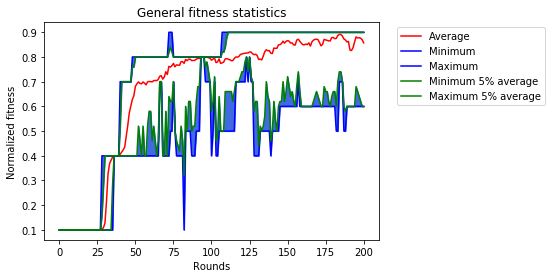

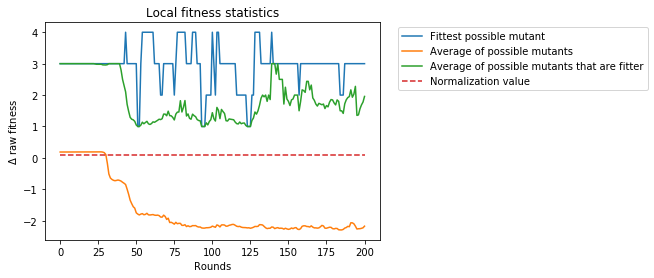

yeah


/home/alexandru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:259: RuntimeWarning: overflow encountered in exp


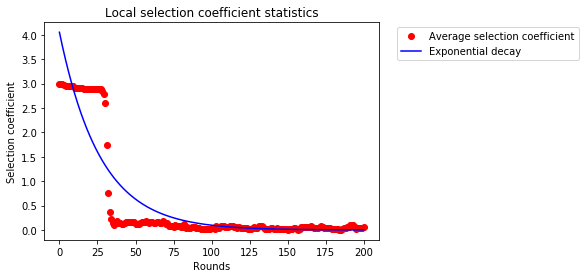

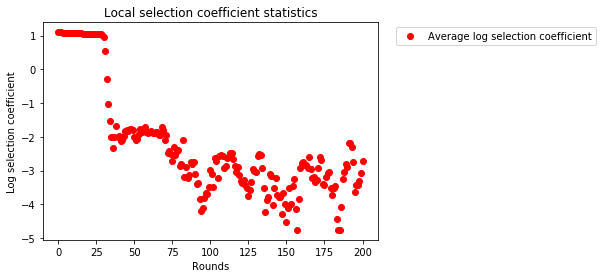

yeah


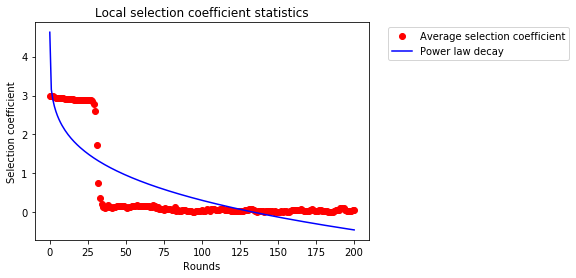

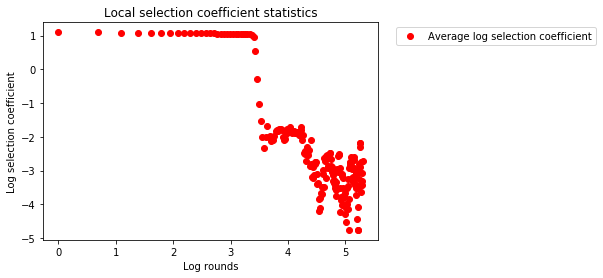

yeah


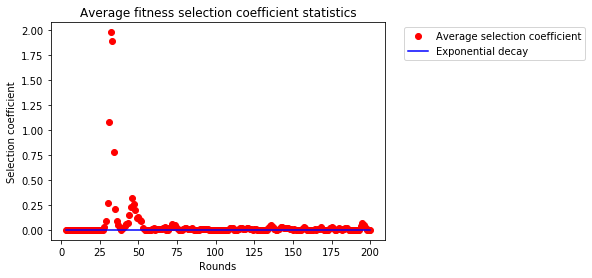

/home/alexandru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:312: RuntimeWarning: divide by zero encountered in log


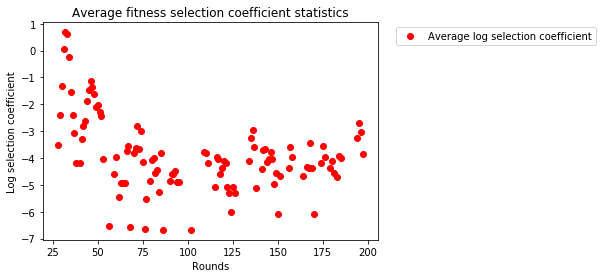

/home/alexandru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:259: RuntimeWarning: overflow encountered in multiply


yeah


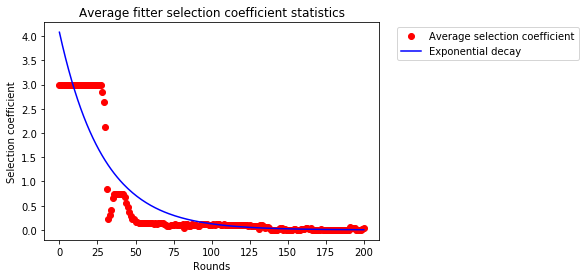

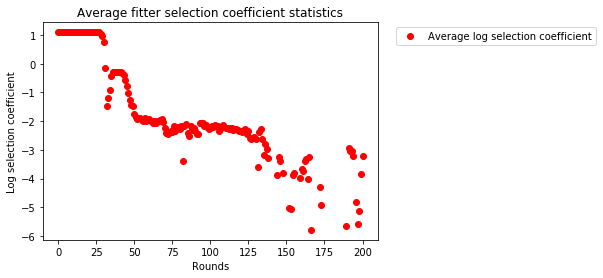

yeah


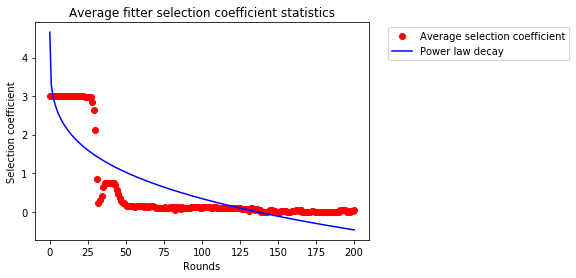

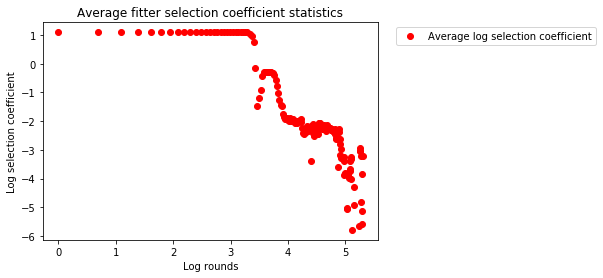

yeah


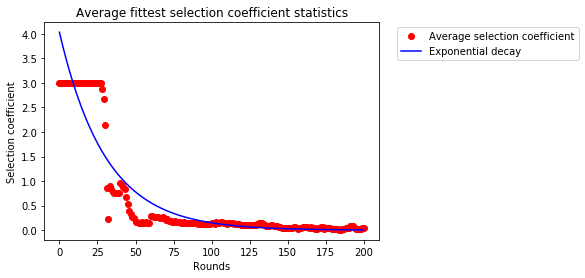

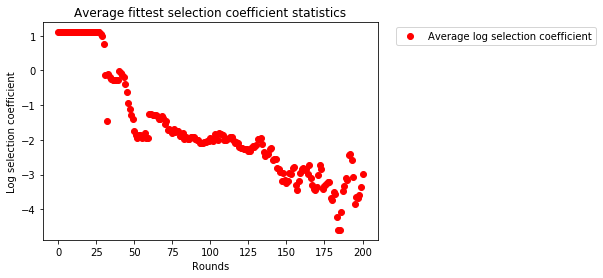

yeah


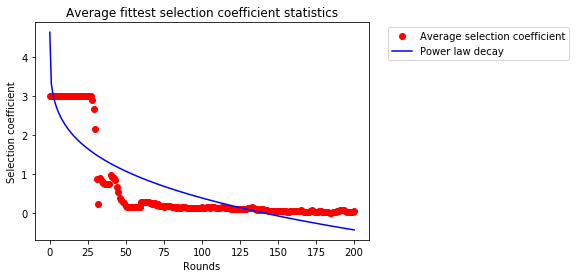

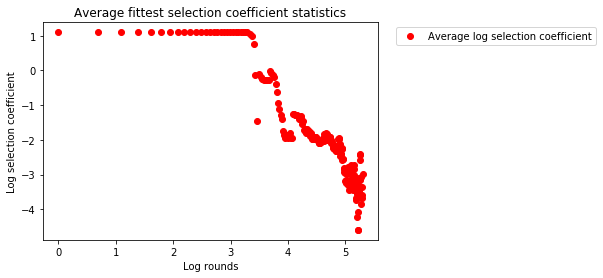

yeah


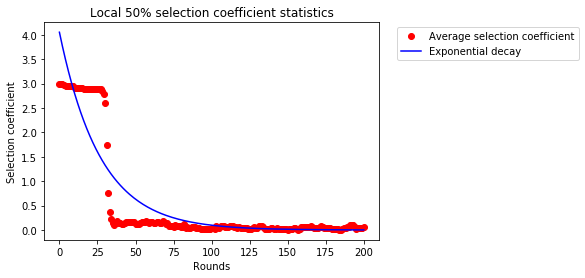

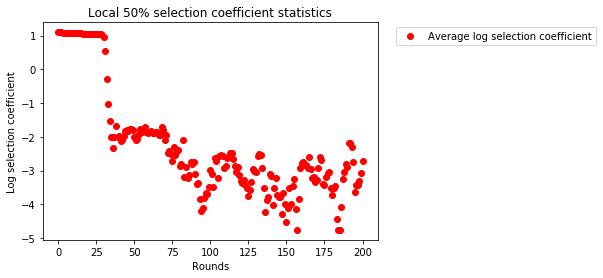

yeah


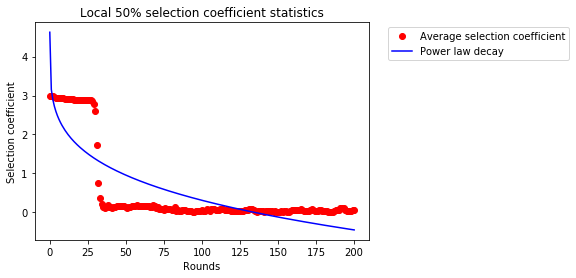

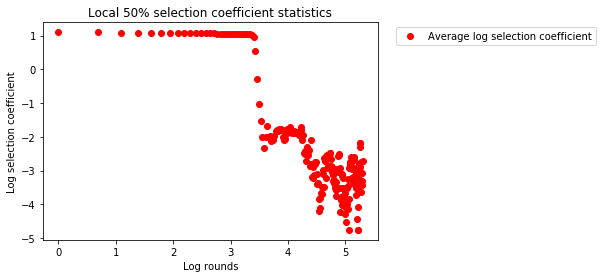

CPU times: user 8.29 s, sys: 4.97 s, total: 13.3 s
Wall time: 5.91 s


In [217]:
%%time

initial = [0,0,0,0,0,0,0,0]
probability = 0.01
rounds = 200
orgNum = 100
cons1 = ConstraintWCSP(([0,1],[["red", "red"]]), 2)
cons2 = ConstraintWCSP(([2,3],[["blue", "yellow"]]), 3)
cons3 = ConstraintWCSP(([5,6,7],[["blue", "red", "red"]]), 3)
cons4 = ConstraintWCSP(([1,6,7],[["yellow", "red", "red"]]), 1)
constraints = [cons1, cons2, cons3, cons4]
domain = ["blue", "red", "yellow"]
domains = [domain] * 8

mySim = Simulator(4, initial, probability, rounds, orgNum, constraints, domains, 1, 1)
mySim.run()
mySim.printStatistics()
mySim.printLocalStatistics()

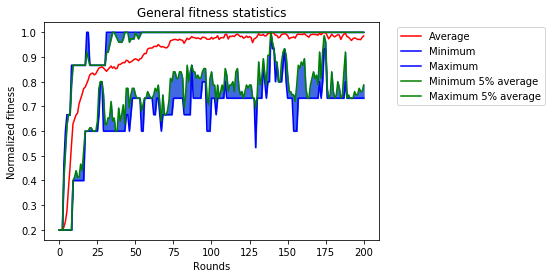

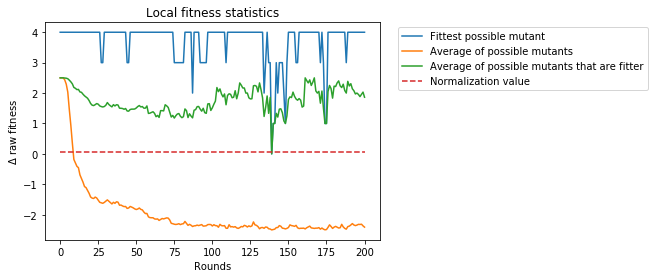

yeah


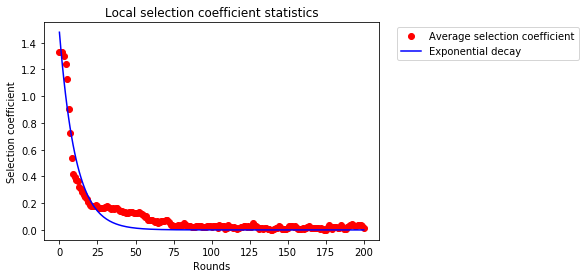

/home/alexandru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:312: RuntimeWarning: divide by zero encountered in log


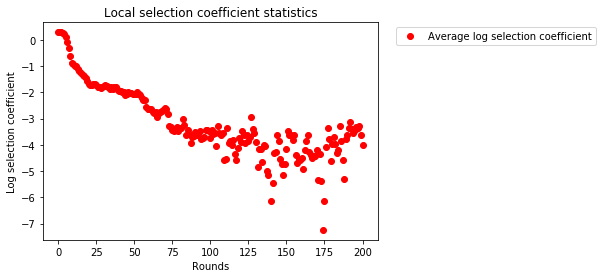

/home/alexandru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:261: RuntimeWarning: divide by zero encountered in power


yeah


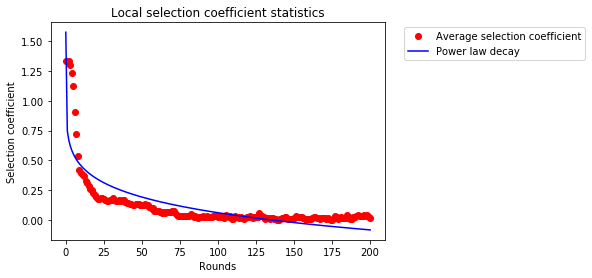

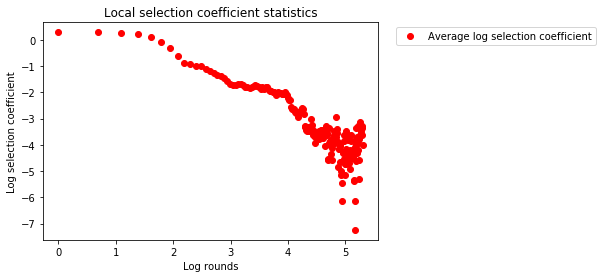

yeah


/home/alexandru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:259: RuntimeWarning: overflow encountered in exp


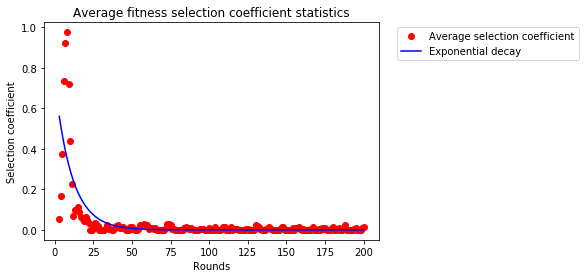

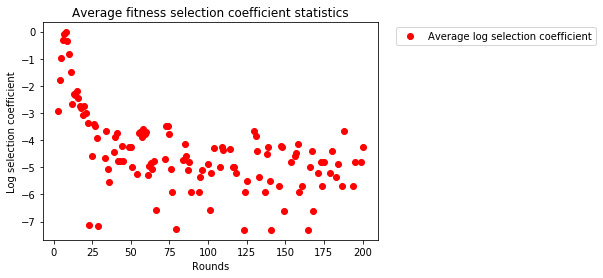

yeah


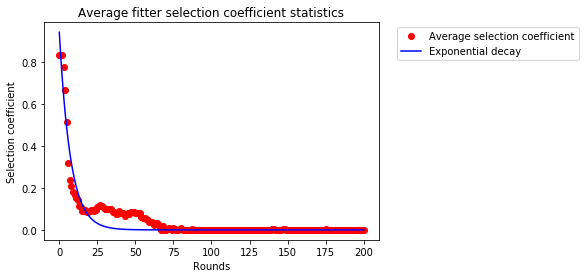

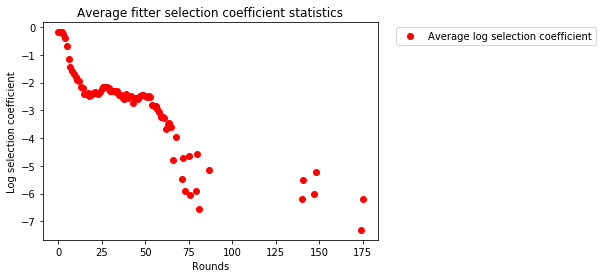

yeah


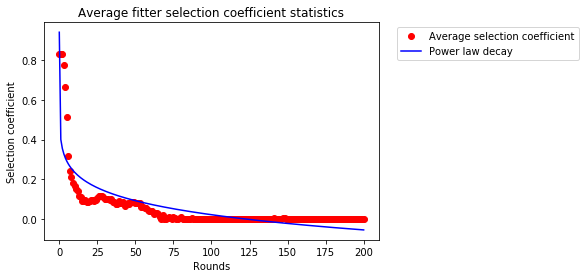

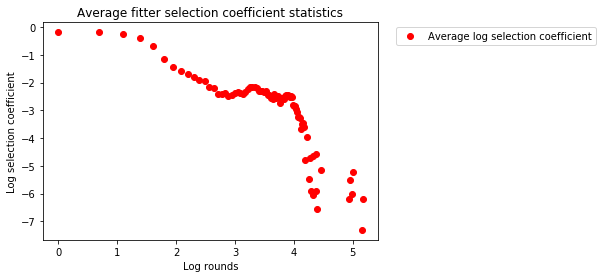

yeah


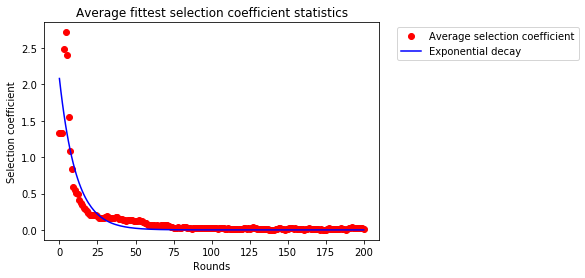

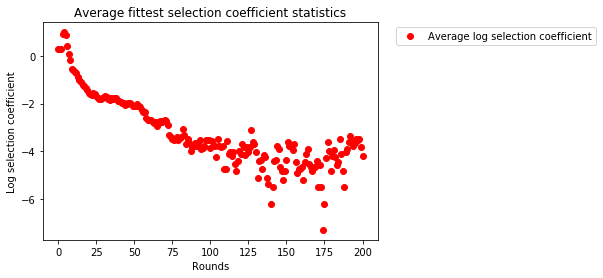

yeah


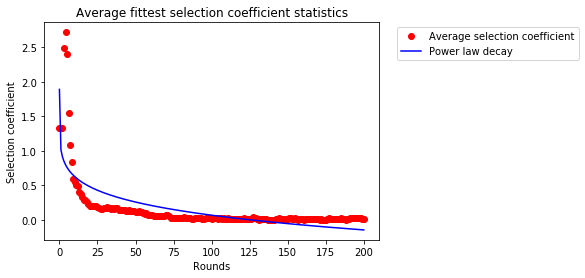

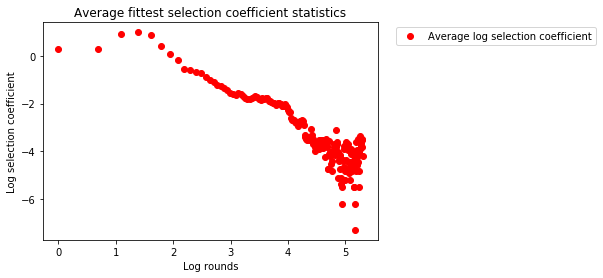

yeah


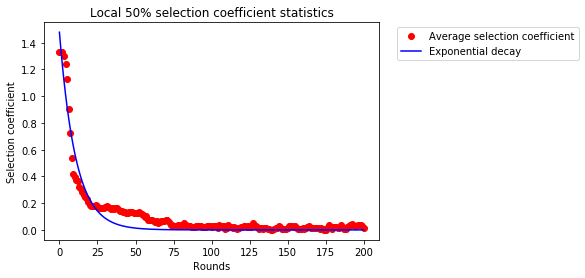

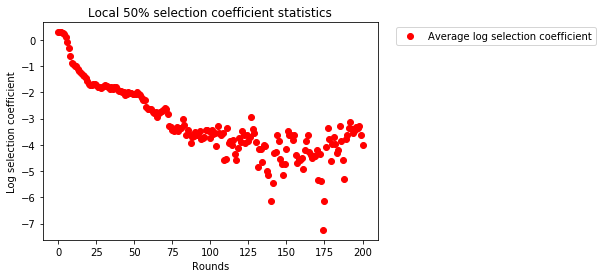

yeah


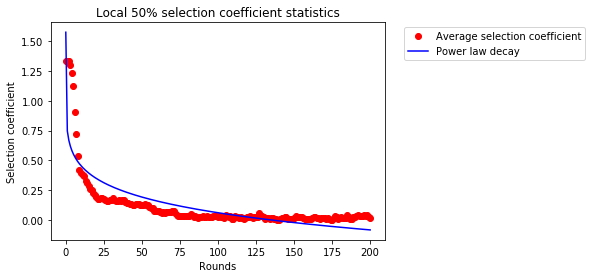

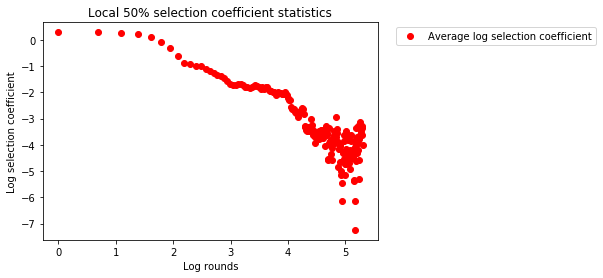

In [220]:
initial = [0,0,0]
probability = 0.01
rounds = 200
orgNum = 100
def myFunc(args):
    return sum(args)
cons = ConstraintVCSP([0,1,2],(myFunc,15))
domain = [1,2,3,4,5]
domains = [domain] * 3
constraints = [cons]

mySim = Simulator(3, initial, probability, rounds, orgNum, constraints, domains, 0, 1)
mySim.run()
mySim.printStatistics()
mySim.printLocalStatistics()

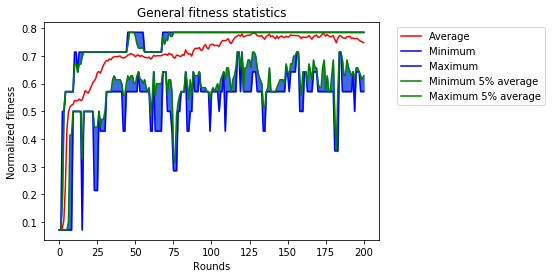

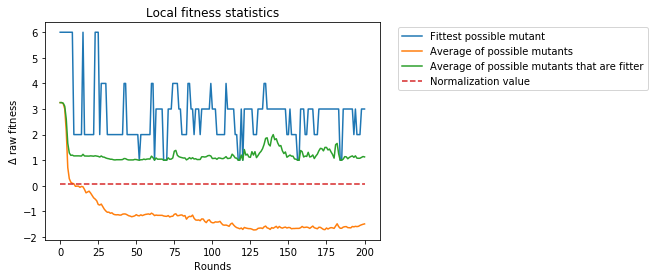

yeah


/home/alexandru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:259: RuntimeWarning: overflow encountered in exp
/home/alexandru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:259: RuntimeWarning: overflow encountered in multiply


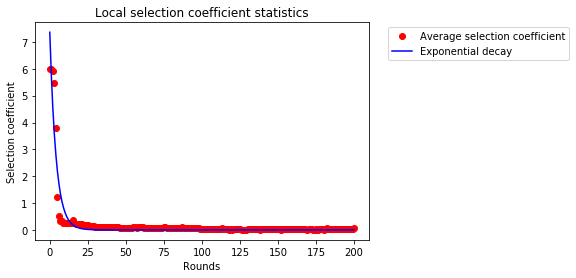

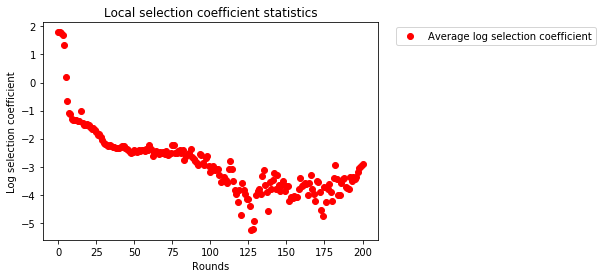

yeah


/home/alexandru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:261: RuntimeWarning: divide by zero encountered in power


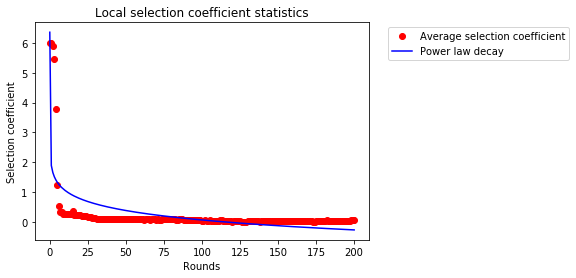

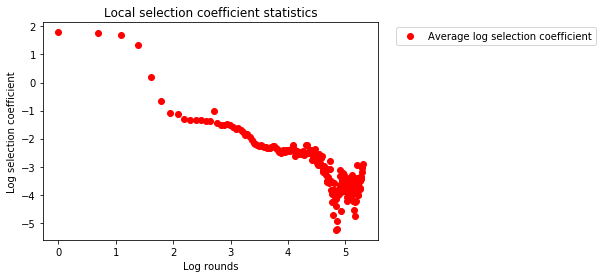

yeah


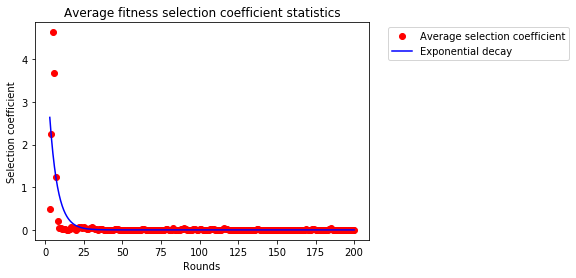

/home/alexandru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:312: RuntimeWarning: divide by zero encountered in log


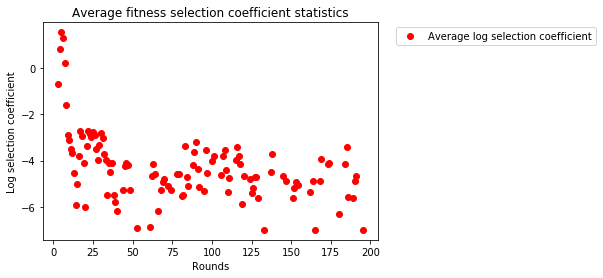

yeah


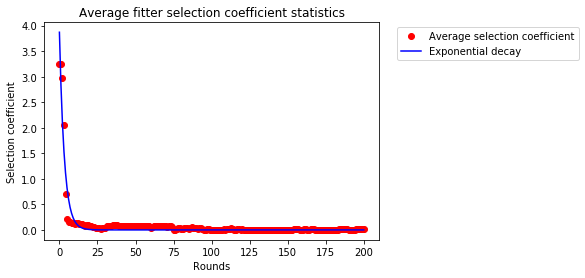

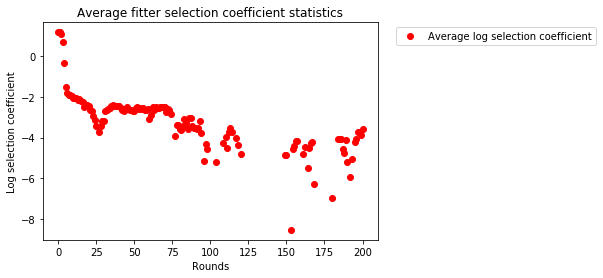

yeah


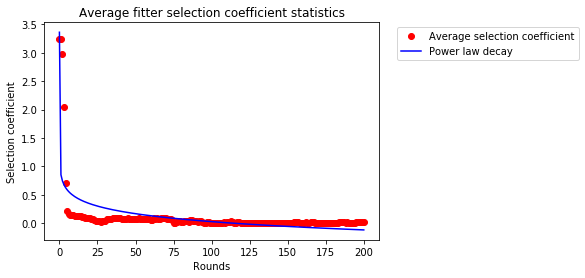

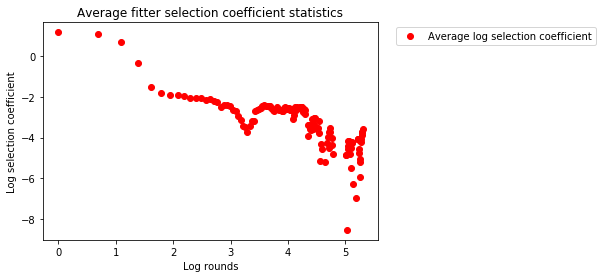

yeah


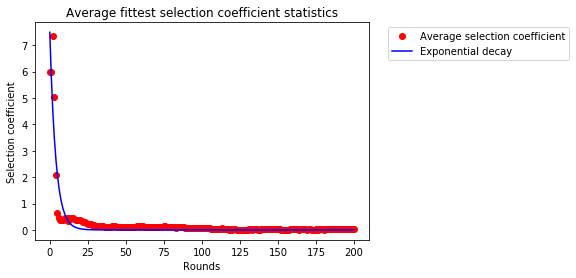

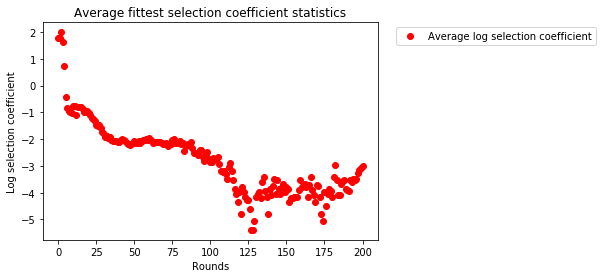

yeah


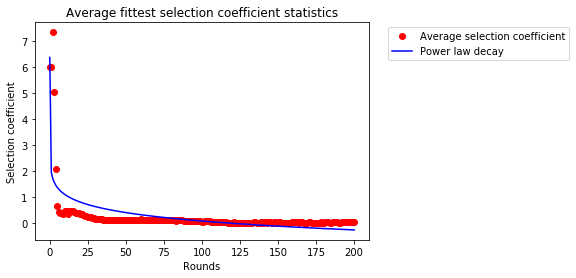

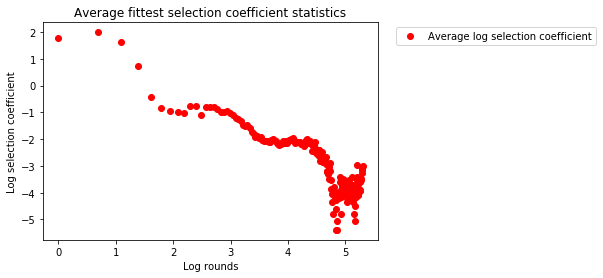

yeah


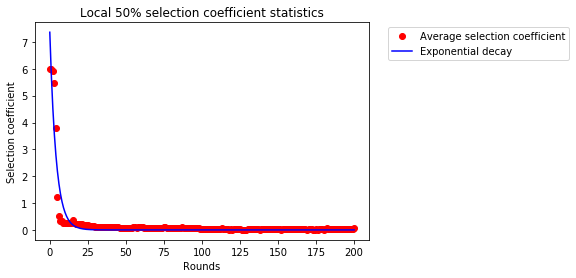

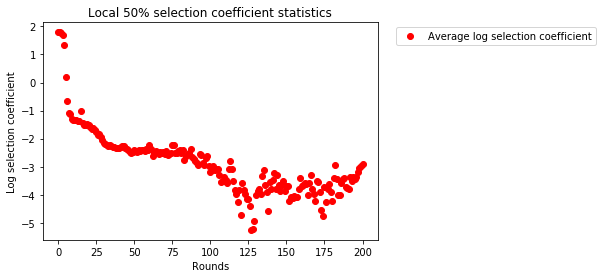

yeah


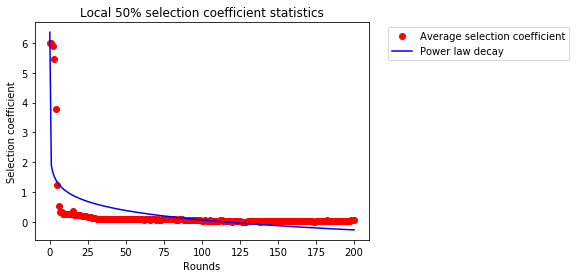

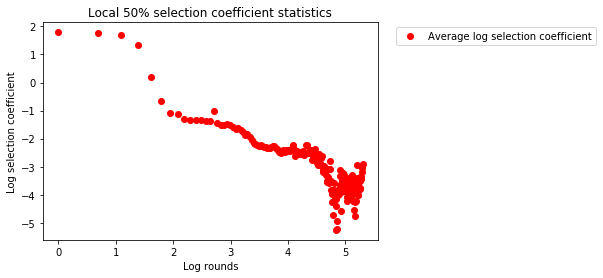

In [221]:
initial = [0] * 8
probability = 0.01
rounds = 200
orgNum = 100
cons3 = ConstraintBinaryModelBinaryDifferent([0,7],[1,1])
cons4 = ConstraintBinaryModelBinaryDifferent([0,1],[1,1])
cons5 = ConstraintBinaryModelBinaryDifferent([1,7],[1,1])
cons6 = ConstraintBinaryModelBinaryDifferent([1,2],[1,1])
cons7 = ConstraintBinaryModelBinaryDifferent([7,2],[1,1])
cons8 = ConstraintBinaryModelBinaryDifferent([2,3],[1,1])
cons9 = ConstraintBinaryModelBinaryDifferent([4,3],[1,1])
cons10 = ConstraintBinaryModelBinaryDifferent([4,7],[1,1])
cons11 = ConstraintBinaryModelBinaryDifferent([4,5],[1,1])
cons12 = ConstraintBinaryModelBinaryDifferent([7,5],[1,1])
cons13 = ConstraintBinaryModelBinaryDifferent([6,5],[1,1])
cons14 = ConstraintBinaryModelBinaryDifferent([6,7],[1,1])
cons15 = ConstraintBinaryModelBinaryDifferent([6,0],[1,1])
constraints = [cons3,cons4,cons5,cons6,cons7,cons8,cons9,cons10,cons11,cons12,cons13,cons14,cons15]

mySim = Simulator(2, initial, probability, rounds, orgNum, constraints, None, 1, 1)
mySim.run()
mySim.printStatistics()
mySim.printLocalStatistics()

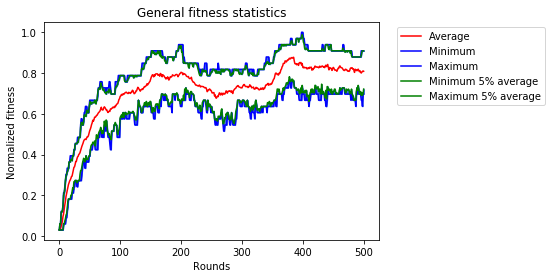

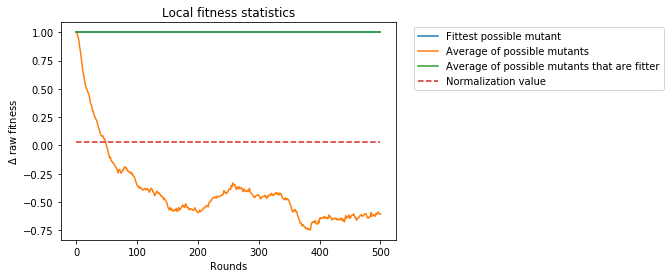

yeah


/home/alexandru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:259: RuntimeWarning: overflow encountered in exp


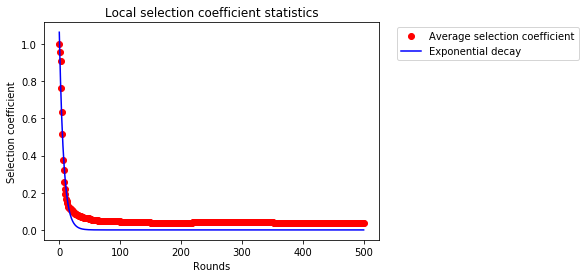

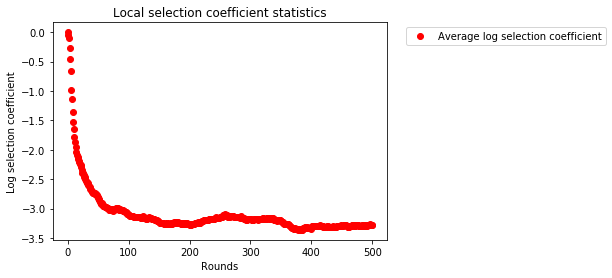

yeah


/home/alexandru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:261: RuntimeWarning: divide by zero encountered in power


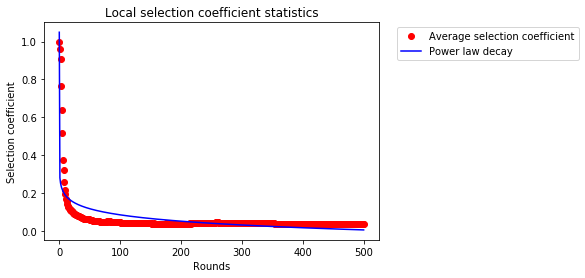

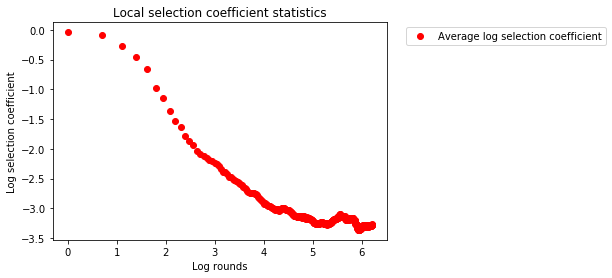

yeah


/home/alexandru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:259: RuntimeWarning: overflow encountered in multiply


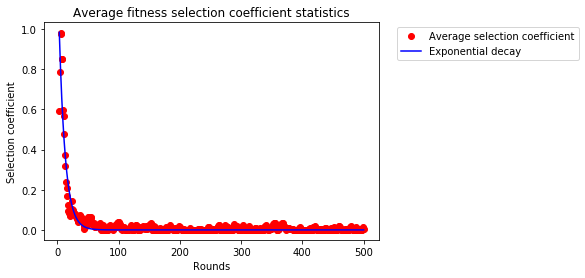

/home/alexandru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:312: RuntimeWarning: divide by zero encountered in log


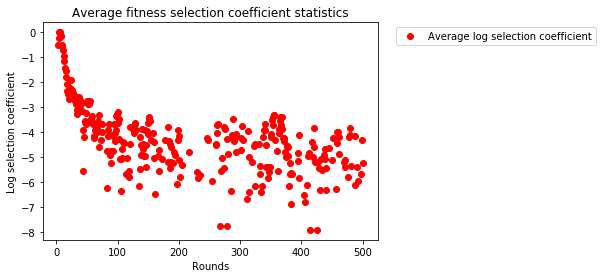

yeah


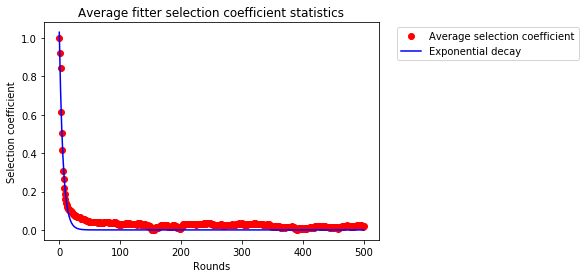

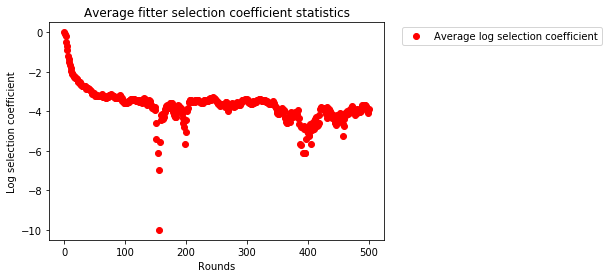

yeah


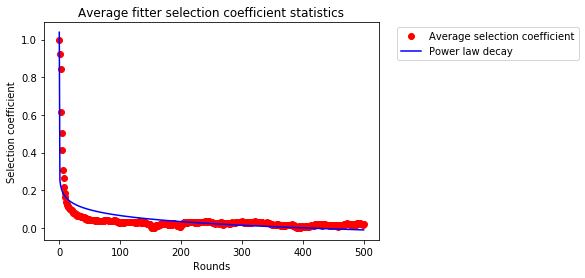

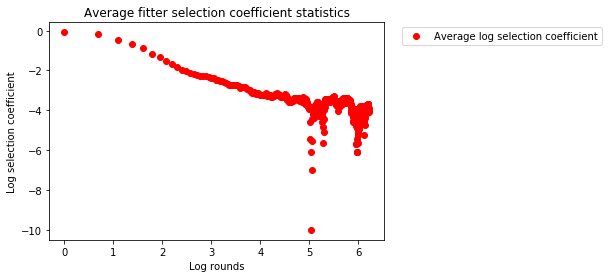

yeah


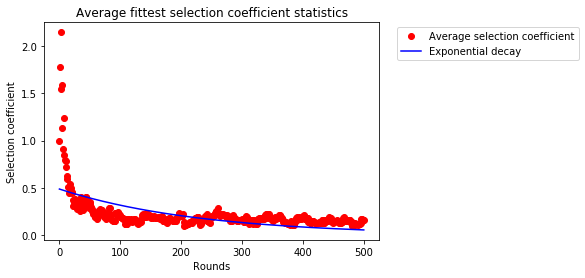

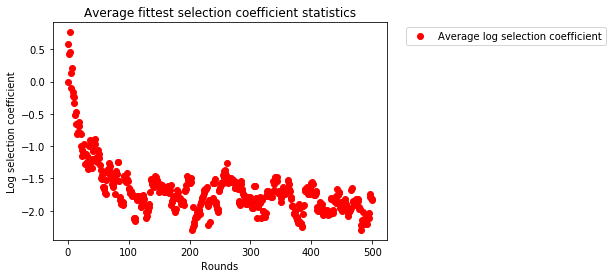

yeah


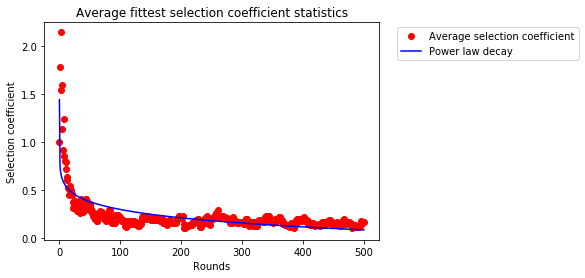

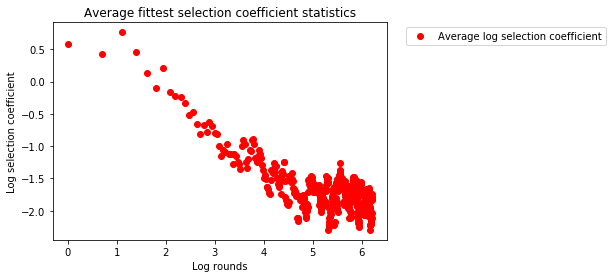

yeah


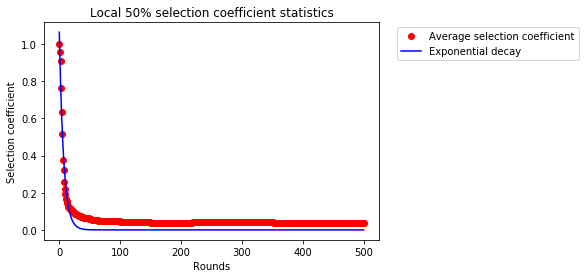

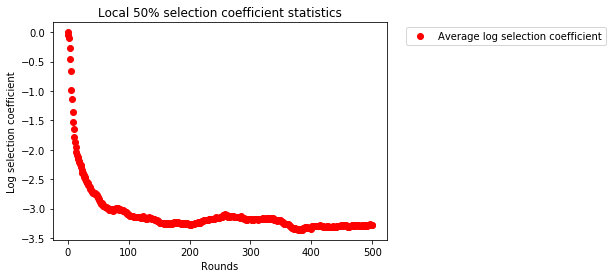

yeah


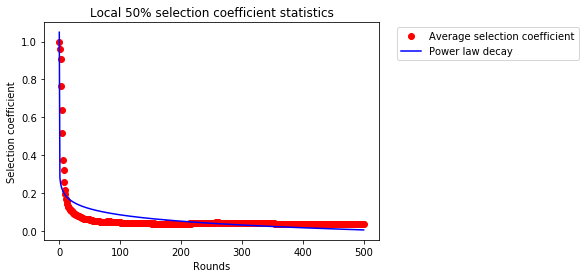

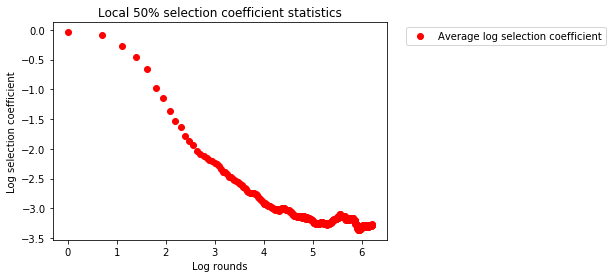

CPU times: user 46.2 s, sys: 4.55 s, total: 50.8 s
Wall time: 44.1 s


In [223]:
%%time

initial = [0] * 32
probability = 0.1
rounds = 500
orgNum = 100
clause1 = ConstraintSat([1],1)
clause2 = ConstraintSat([2],1)
clause3 = ConstraintSat([3],1)
clause4 = ConstraintSat([4],1)
clause5 = ConstraintSat([5],1)
clause6 = ConstraintSat([6],1)
clause7 = ConstraintSat([7],1)
clause8 = ConstraintSat([8],1)
clause9 = ConstraintSat([9],1)
clause10 = ConstraintSat([10],1)
clause11 = ConstraintSat([11],1)
clause12 = ConstraintSat([12],1)
clause13 = ConstraintSat([13],1)
clause14 = ConstraintSat([14],1)
clause15 = ConstraintSat([15],1)
clause16 = ConstraintSat([16],1)
clause17 = ConstraintSat([17],1)
clause18 = ConstraintSat([18],1)
clause19 = ConstraintSat([19],1)
clause20 = ConstraintSat([20],1)
clause21 = ConstraintSat([21],1)
clause22 = ConstraintSat([22],1)
clause23 = ConstraintSat([23],1)
clause24 = ConstraintSat([24],1)
clause25 = ConstraintSat([25],1)
clause26 = ConstraintSat([26],1)
clause27 = ConstraintSat([27],1)
clause28 = ConstraintSat([28],1)
clause29 = ConstraintSat([29],1)
clause30 = ConstraintSat([30],1)
clause31 = ConstraintSat([31],1)
clause32 = ConstraintSat([32],1)
clauses = [clause1, clause2, clause3, clause4, clause5, clause6, clause7, clause8, clause9, clause10, clause11, clause12, clause13, clause14, clause15, clause16, clause17, clause18, clause19, clause20, clause21, clause22, clause23, clause24, clause25, clause26, clause27, clause28, clause29, clause30, clause31, clause32]

mySim = Simulator(1, initial, probability, rounds, orgNum, clauses, None, 1, 1)
mySim.run()
mySim.printStatistics()
mySim.printLocalStatistics()

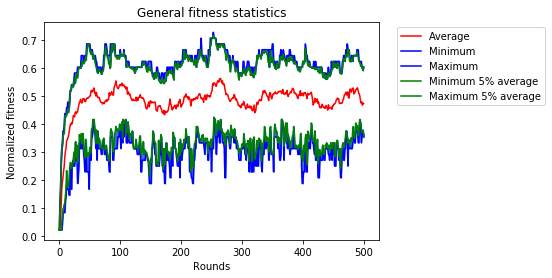

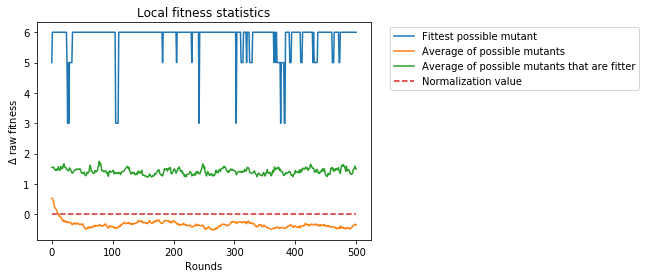

/home/alexandru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:151: RuntimeWarning: overflow encountered in multiply


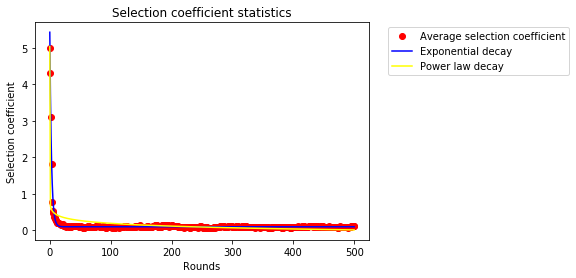

CPU times: user 1min 15s, sys: 11.9 ms, total: 1min 15s
Wall time: 1min 15s


In [59]:
%%time

initial = [0] * 32
probability = [0.01] * 32
rounds = 500
orgNum = 100
clause1 = ConstraintSat([1,5,7],1)
clause2 = ConstraintSat([2,1,3],2)
clause3 = ConstraintSat([-3,5,7],1)
clause4 = ConstraintSat([4,2],1)
clause5 = ConstraintSat([-5,3],2)
clause6 = ConstraintSat([-6,18],1)
clause7 = ConstraintSat([7,23],1)
clause8 = ConstraintSat([8,-19],3)
clause9 = ConstraintSat([9,-1],1)
clause10 = ConstraintSat([10,-6],1)
clause11 = ConstraintSat([11,-12,-22],2)
clause12 = ConstraintSat([12,11],1)
clause13 = ConstraintSat([13,14],1)
clause14 = ConstraintSat([14,-1],5)
clause15 = ConstraintSat([15,-29],1)
clause16 = ConstraintSat([16,32],1)
clause17 = ConstraintSat([17,-31],1)
clause18 = ConstraintSat([18,5],1)
clause19 = ConstraintSat([19,4],1)
clause20 = ConstraintSat([20,17],3)
clause21 = ConstraintSat([21,-7],1)
clause22 = ConstraintSat([22,-2],1)
clause23 = ConstraintSat([-23,4],1)
clause24 = ConstraintSat([24,-7],1)
clause25 = ConstraintSat([25,-6],1)
clause26 = ConstraintSat([26,-2],1)
clause27 = ConstraintSat([27],2)
clause28 = ConstraintSat([28],1)
clause29 = ConstraintSat([29],3)
clause30 = ConstraintSat([30],1)
clause31 = ConstraintSat([31],2)
clause32 = ConstraintSat([32],1)
clauses = [clause1, clause2, clause3, clause4, clause5, clause6, clause7, clause8, clause9, clause10, clause11, clause12, clause13, clause14, clause15, clause16, clause17, clause18, clause19, clause20, clause21, clause22, clause23, clause24, clause25, clause26, clause27, clause28, clause29, clause30, clause31, clause32]

mySim = Simulator(1, initial, probability, rounds, orgNum, clauses, None, 1)
mySim.run()
mySim.printStatistics()
mySim.printLocalStatistics()

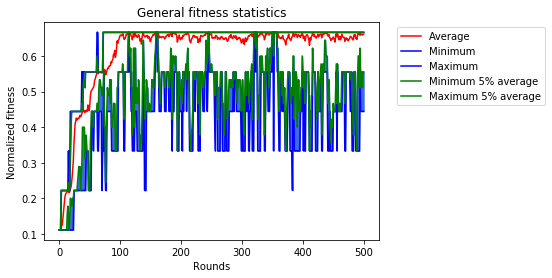

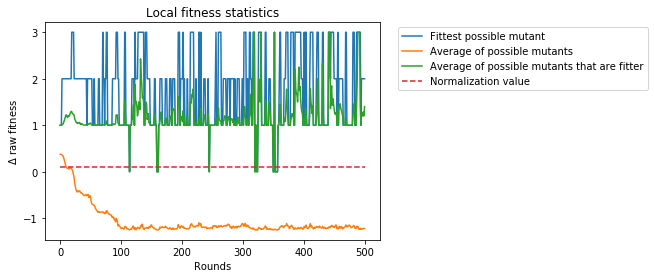

yeah


/home/alexandru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:259: RuntimeWarning: overflow encountered in exp


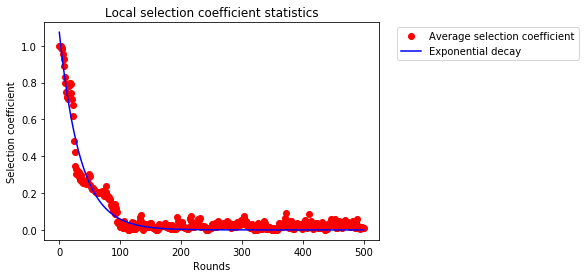

/home/alexandru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:312: RuntimeWarning: divide by zero encountered in log


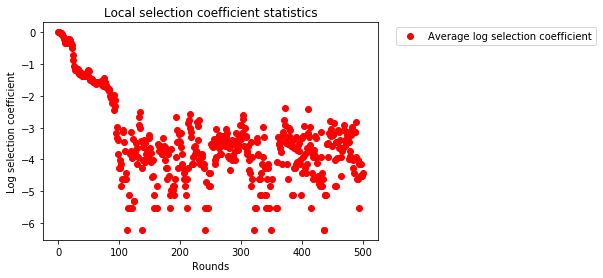

yeah


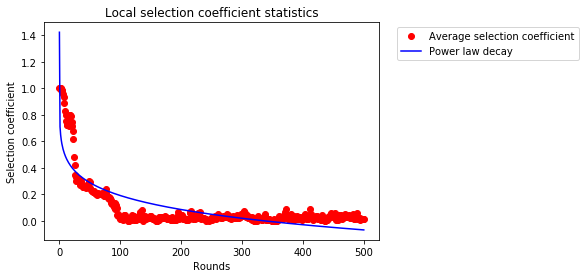

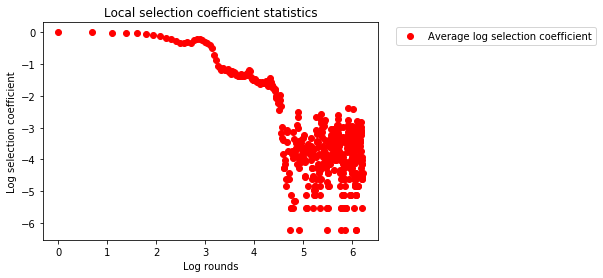

yeah


/home/alexandru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:259: RuntimeWarning: overflow encountered in multiply


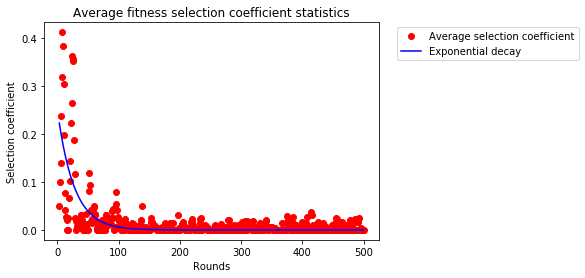

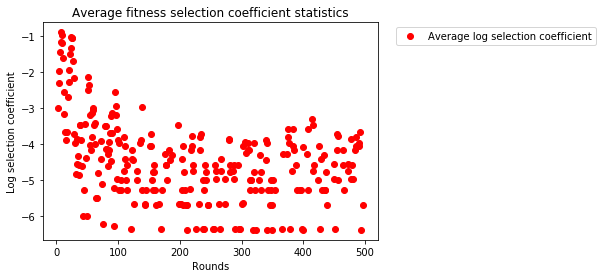

yeah


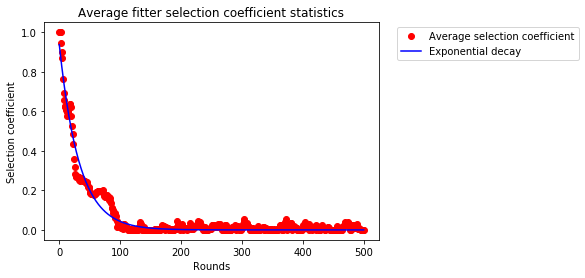

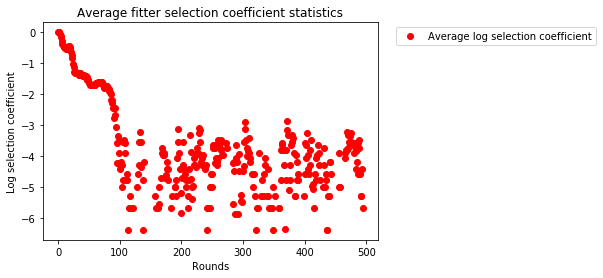

yeah


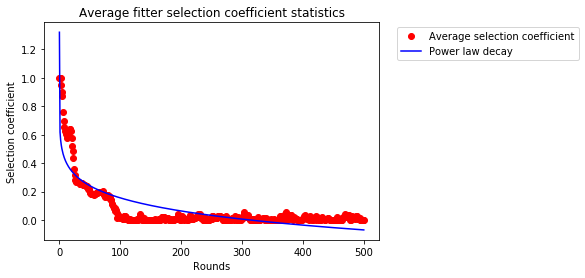

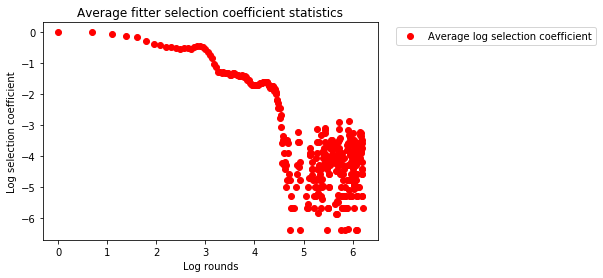

yeah


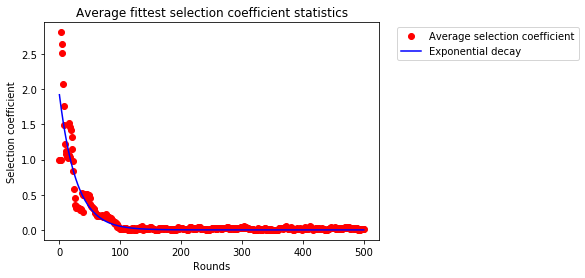

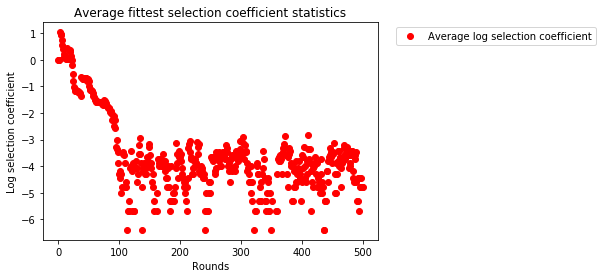

yeah


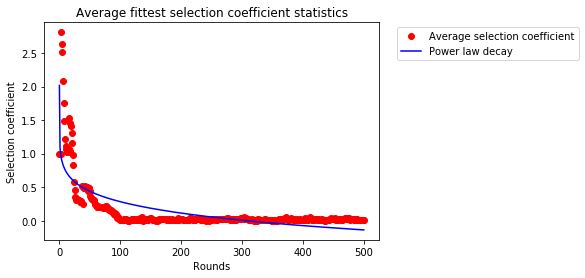

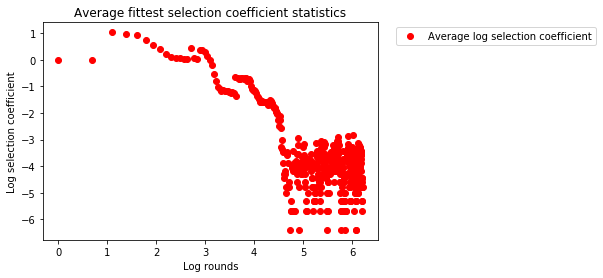

yeah


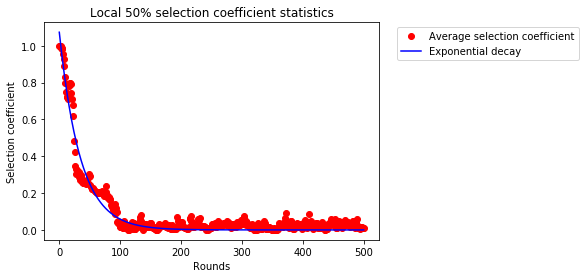

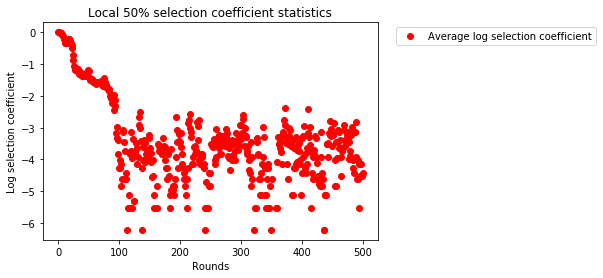

yeah


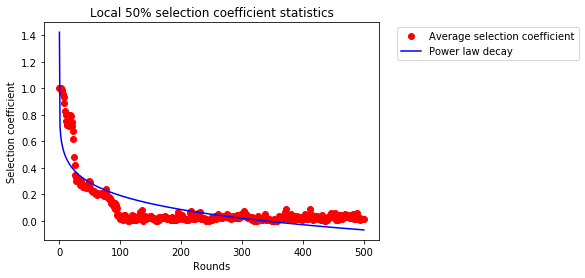

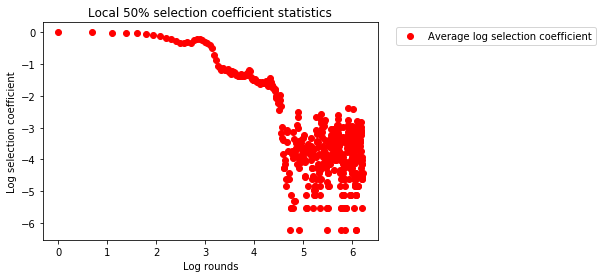

CPU times: user 11.4 s, sys: 4.82 s, total: 16.2 s
Wall time: 9.4 s


In [226]:
%%time

initial = [0, 0, 0, 0, 0, 0, 0, 0]
probability = 0.01
rounds = 500
orgNum = 100
clause1 = ConstraintSat([1,2,3],1)
clause2 = ConstraintSat([5,-4,7],1)
clause3 = ConstraintSat([6,7],1)
clause4 = ConstraintSat([1,-2],1)
clause5 = ConstraintSat([5,8],1)
clause6 = ConstraintSat([6,-8],1)
clause7 = ConstraintSat([7,-3],1)
clause8 = ConstraintSat([8,3],1)
clauses = [clause1, clause2, clause3, clause4, clause5, clause6, clause7, clause8]

mySim = Simulator(1, initial, probability, rounds, orgNum, clauses, None, 1, 1)
mySim.run()
mySim.printStatistics()
mySim.printLocalStatistics()

In [ ]:
#Observations:
#    Under this model, they tend to converge to an optimum quite fast
    
#What to do:
#    How to select the children / try various methods
#    For local statistics, how to plot the individuals
#    Use joyplots

[3]
